In [9]:
pip install numpy pandas seaborn matplotlib dataprep scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report

# <p style="padding:10px;background-color:#D63B52;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Steps</p>

In [5]:
df = pd.read_csv('./Datasets/titanic_train.csv')

#### 1. How big is the data?

In [3]:
df.shape

(891, 12)

#### 2. How does the data look like?

In [4]:
df.sample(5)

PassengerId  Survived  Pclass  \
862          863         1       1   
174          175         0       1   
107          108         1       3   
528          529         0       3   
61            62         1       1   

                                                  Name     Sex   Age  SibSp  \
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  female  48.0      0   
174                            Smith, Mr. James Clinch    male  56.0      0   
107                             Moss, Mr. Albert Johan    male   NaN      0   
528                          Salonen, Mr. Johan Werner    male  39.0      0   
61                                 Icard, Miss. Amelie  female  38.0      0   

     Parch   Ticket     Fare Cabin Embarked  
862      0    17466  25.9292   D17        S  
174      0    17764  30.6958    A7        C  
107      0   312991   7.7750   NaN        S  
528      0  3101296   7.9250   NaN        S  
61       0   113572  80.0000   B28      NaN

#### 3. What is the data type of cols?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 4. Are there any missing values?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 5. How does the data look mathematically?

In [7]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#### 6. Are there duplicate values?

In [9]:
df.duplicated().sum()

np.int64(0)

#### 7. How is the correlation between cols?

In [14]:
# Correlation between numerical data type
df[df.select_dtypes(include='number').columns.tolist()].corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [15]:
df[df.select_dtypes(include='number').columns.tolist()].corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Univariate Analysis - Analysis of single variable</p>

In [16]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Catagorical Variable

<Axes: xlabel='Embarked', ylabel='count'>

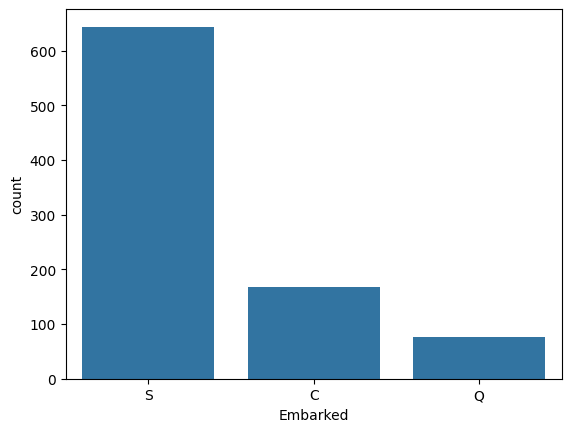

In [22]:
sns.countplot(x=df['Embarked'])

<Axes: xlabel='Survived', ylabel='count'>

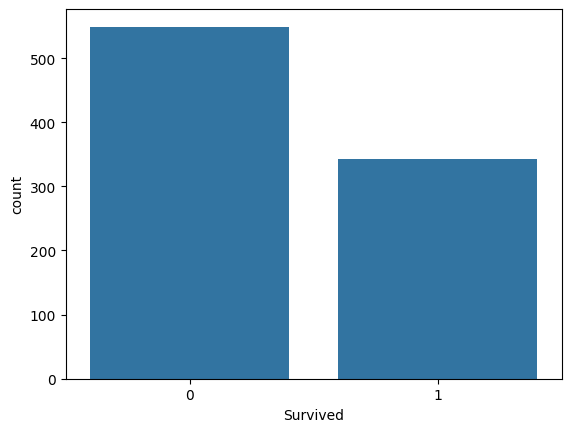

In [21]:
sns.countplot(x=df['Survived'])
#df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

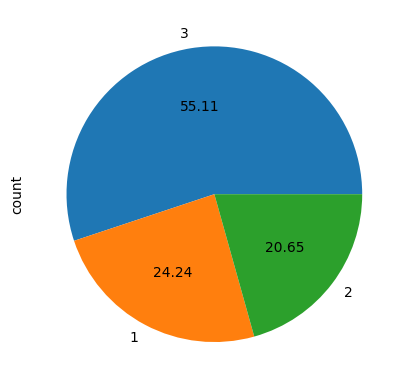

In [27]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

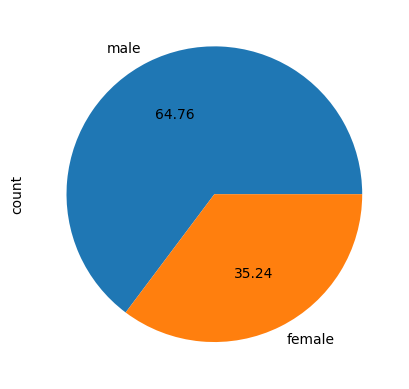

In [24]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

#### Numarical Variabel

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

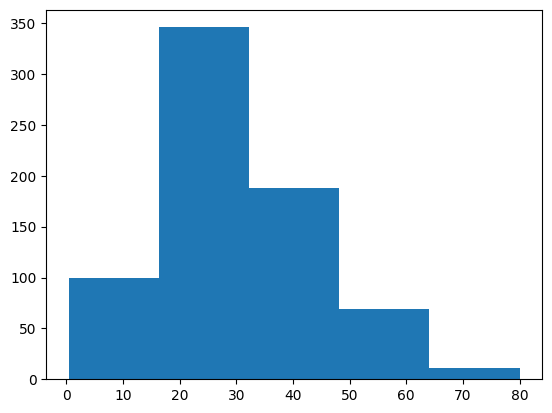

In [29]:
plt.hist(df['Age'],bins=5)

<Axes: xlabel='Age', ylabel='Count'>

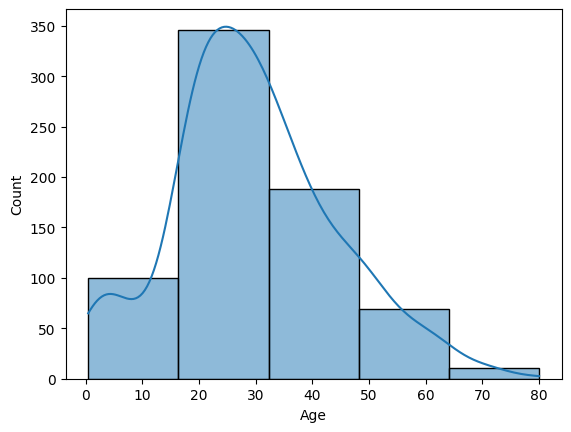

In [39]:
sns.histplot(df["Age"], kde=True, bins=5)

<Axes: ylabel='Age'>

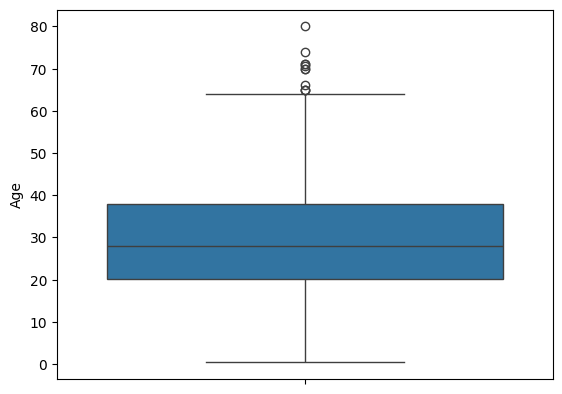

In [44]:
# sns.boxplot(df["Survived"])
sns.boxplot(df["Age"])

##### you can apply all aggregate function to get more knowlgede

In [45]:
df['Age'].max()

np.float64(80.0)

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Biavariate and Multivariate Analysis - Analysis of single variable</p>

In [46]:
tips = sns.load_dataset('tips')

In [47]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [8]:
titanic = pd.read_csv('./Datasets/titanic_train.csv')

In [53]:
flights = sns.load_dataset('flights')

In [54]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [55]:
iris = sns.load_dataset('iris')

In [95]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

#### 1. Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

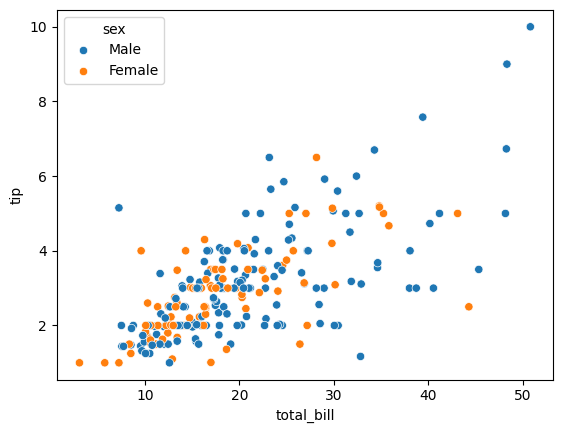

In [60]:
# Bivariant analysis
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips["sex"])

<Axes: xlabel='total_bill', ylabel='tip'>

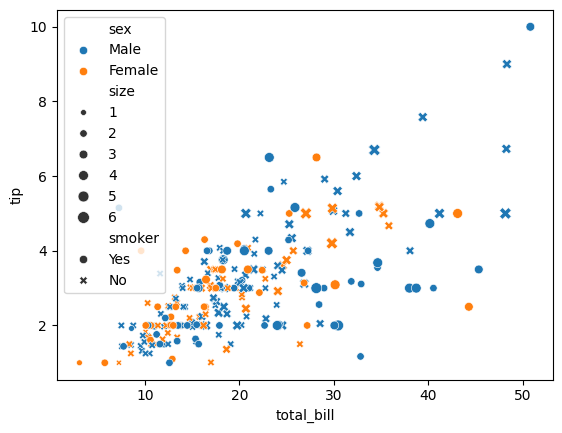

In [63]:
# Multivariant analysis
# sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips["sex"]) # 3 variable
# sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips["sex"], style=tips["smoker"]) # 4 variable
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue=tips["sex"], style=tips["smoker"], size=tips["size"]) # 5 variable

#### 2. Bar Plot (Numerical - Categorical)

In [64]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<Axes: xlabel='Pclass', ylabel='Fare'>

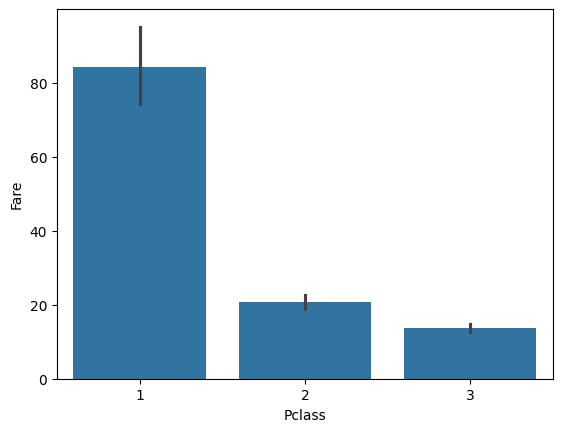

In [68]:
sns.barplot(x=titanic['Pclass'], y=titanic['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

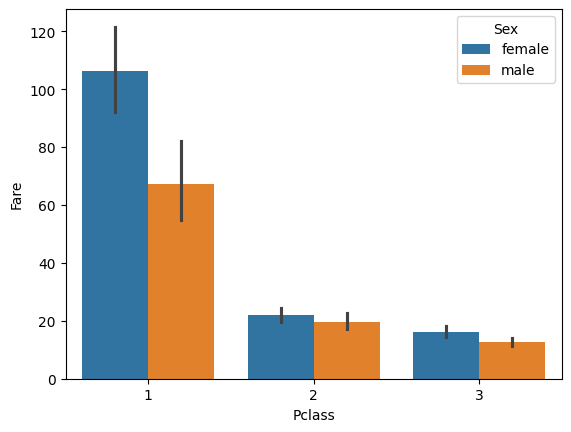

In [69]:
sns.barplot(x=titanic['Pclass'], y=titanic['Fare'], hue=titanic['Sex'])

<Axes: xlabel='Pclass', ylabel='Age'>

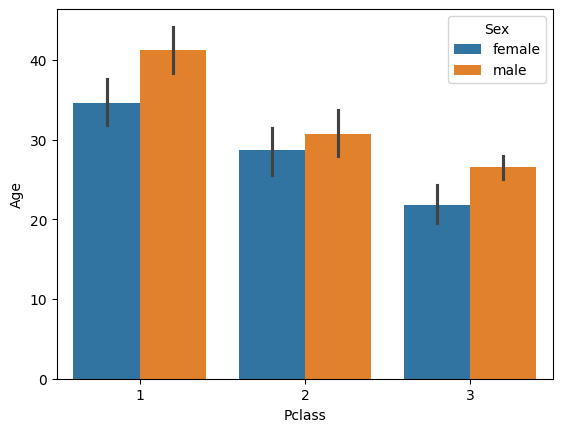

In [66]:
sns.barplot(x=titanic['Pclass'], y=titanic['Age'], hue=titanic['Sex'])

#### 3. Box Plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

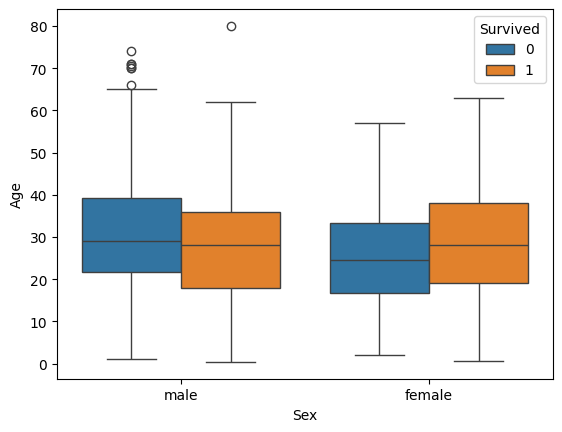

In [70]:
sns.boxplot(x=titanic['Sex'], y=titanic['Age'], hue=titanic['Survived'])

#### 4. Distplot (Numerical - Categorical)

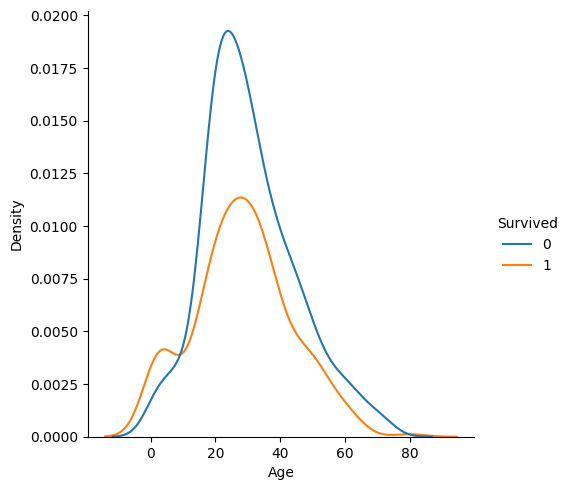

In [81]:
sns.displot(x=titanic['Age'], hue=titanic['Survived'], kind='kde')

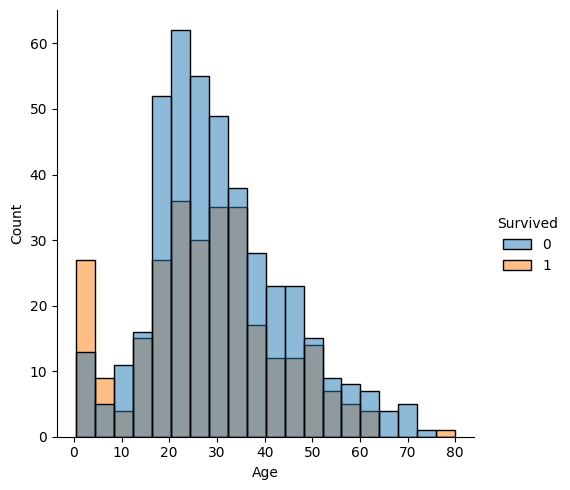

In [82]:
sns.displot(x=titanic['Age'], hue=titanic['Survived'], kind='hist')

<Axes: xlabel='Age', ylabel='Count'>

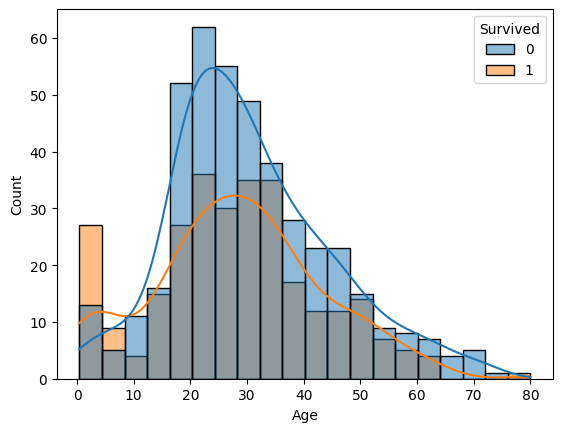

In [83]:
sns.histplot(x=titanic['Age'], hue=titanic["Survived"], kde=True)

#### 5. HeatMap (Categorical - Categorical)

In [ ]:
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

<Axes: xlabel='Survived', ylabel='Pclass'>

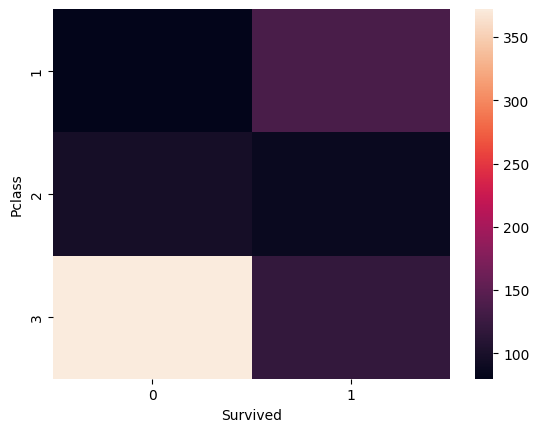

In [84]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [89]:
titanic.groupby('Embarked')['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

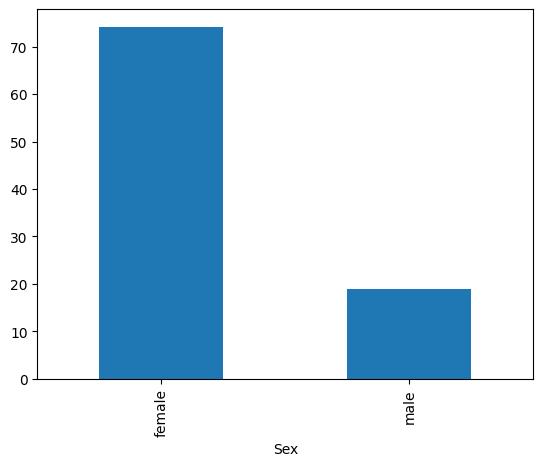

In [91]:
(titanic.groupby('Sex')['Survived'].mean()*100).plot(kind="bar")

#### 6. ClusterMap (Categorical - Categorical)

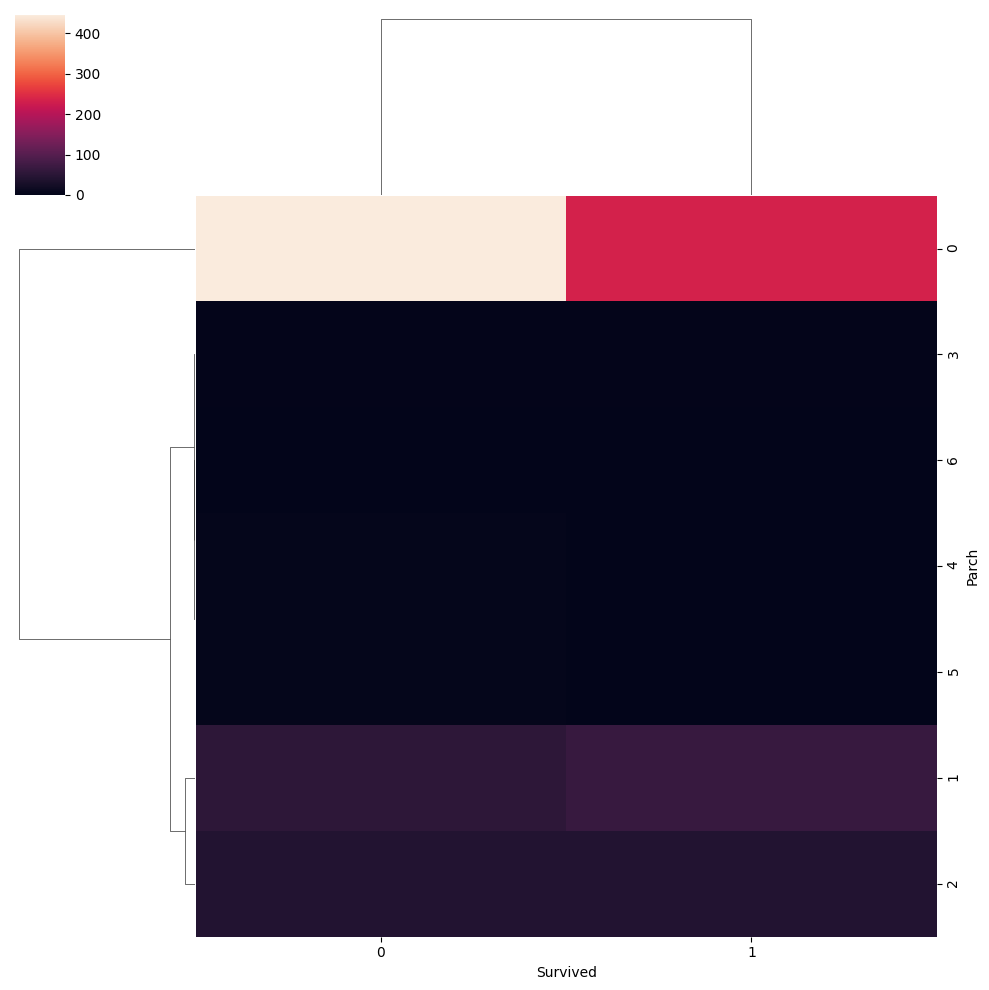

In [92]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

#### 7. Pairplot (Numerical - Numerical)

In [93]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

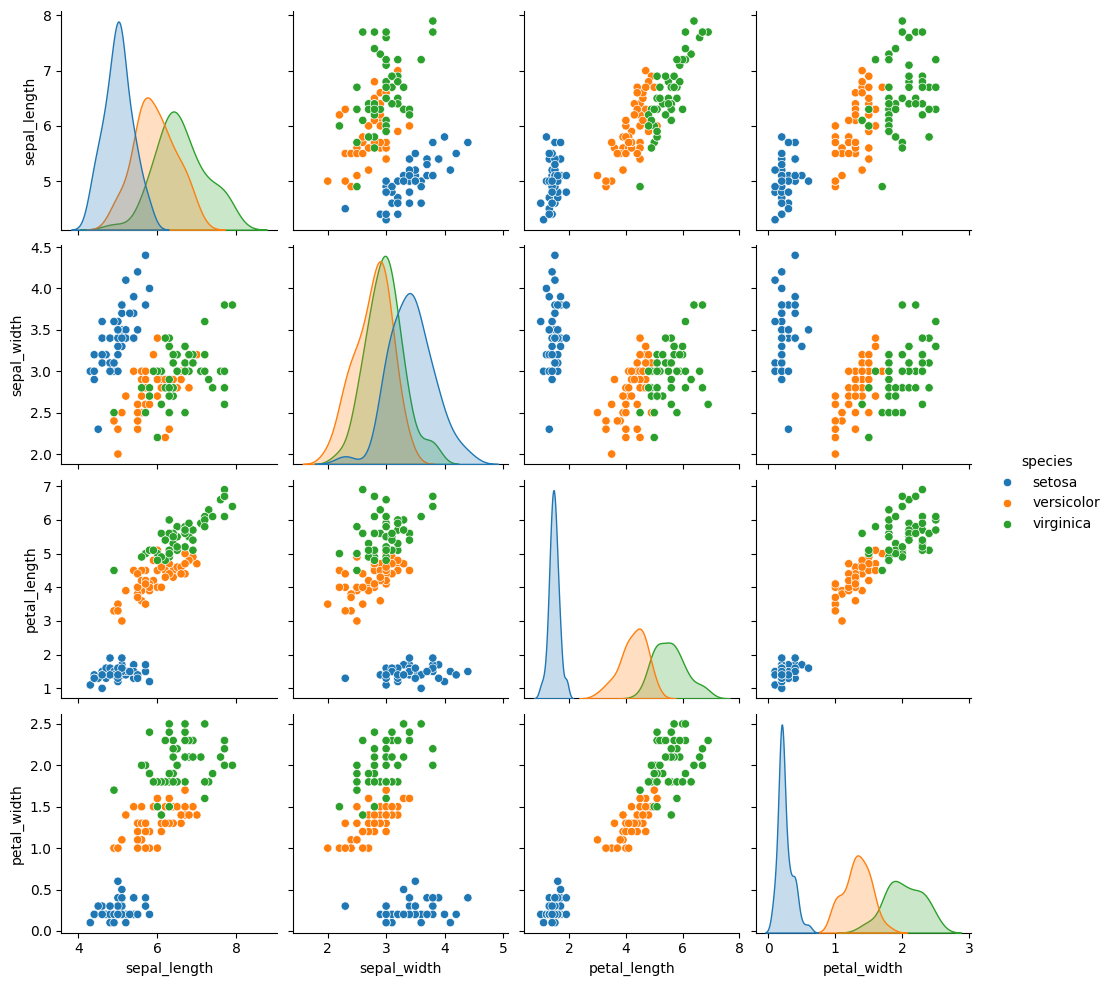

In [94]:
sns.pairplot(iris,hue='species')

#### 8. Lineplot (Mainly for continous points like timeseries data) (Numerical - Numerical)

In [100]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [103]:
new = flights.groupby('year')[["passengers"]].sum().reset_index()
new

year  passengers
0   1949        1520
1   1950        1676
2   1951        2042
3   1952        2364
4   1953        2700
5   1954        2867
6   1955        3408
7   1956        3939
8   1957        4421
9   1958        4572
10  1959        5140
11  1960        5714

<Axes: xlabel='year', ylabel='passengers'>

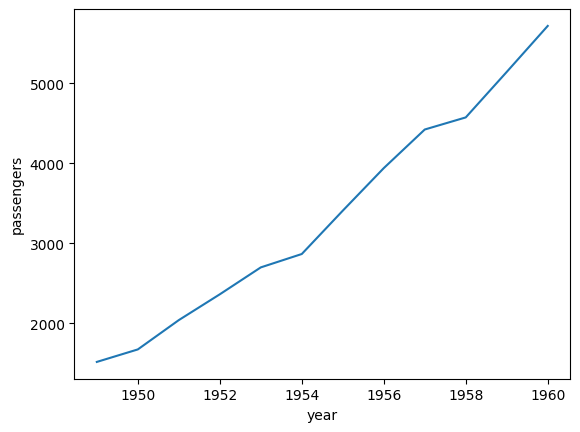

In [105]:
sns.lineplot(x=new['year'], y=new['passengers'])

C:\Users\saura\AppData\Local\Temp\ipykernel_9664\2230379170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))


<Axes: xlabel='year', ylabel='month'>

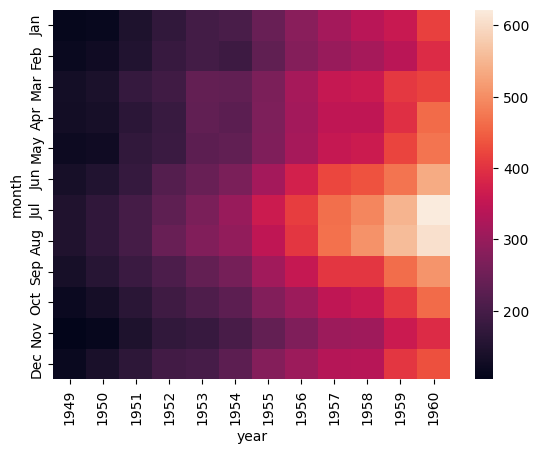

In [107]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

C:\Users\saura\AppData\Local\Temp\ipykernel_9664\1868718285.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))


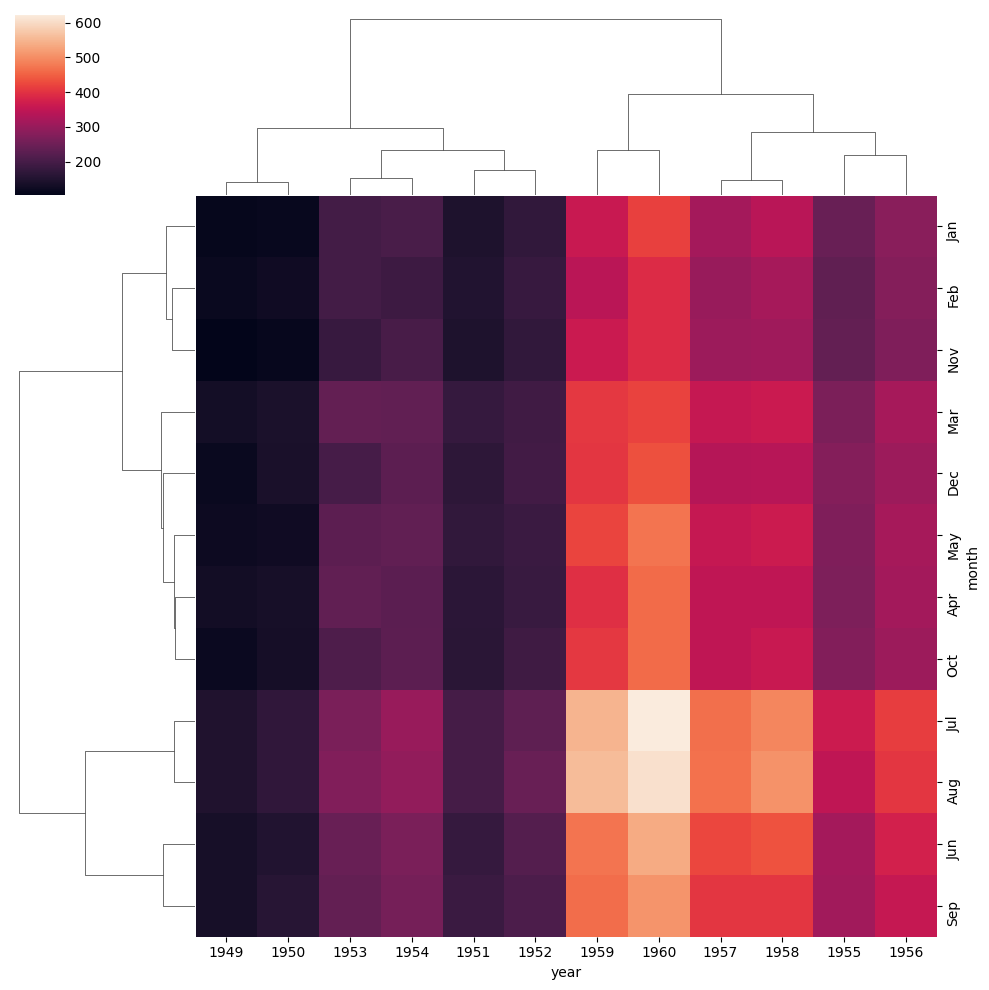

In [106]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA Using Library
</p>

1.	DataPrep
2.	Pandas Profiling
3.	SweetViz
4.	AutoViz

In [7]:
# report = create_report(df)
# report

# <p style="padding:10px;background-color:#D63B52;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Engineering</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Scaling - Standardization</p>

In [11]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

In [12]:
df=df.iloc[:,2:]

In [13]:
df.sample(5)

Age  EstimatedSalary  Purchased
193   19            70000          0
286   37            62000          0
18    46            28000          1
285   37            93000          1
230   35           147000          1

### Train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

### StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [26]:
X_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [28]:
# Fit will return numpy array so we need to convert it to df
X_train_scaled[:10, :10]

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285]])

In [29]:
# Converting both train and test numpy to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [30]:
X_train_scaled

Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]

In [31]:
np.round(X_train.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [32]:
np.round(X_train_scaled.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

### Effect of Scaling

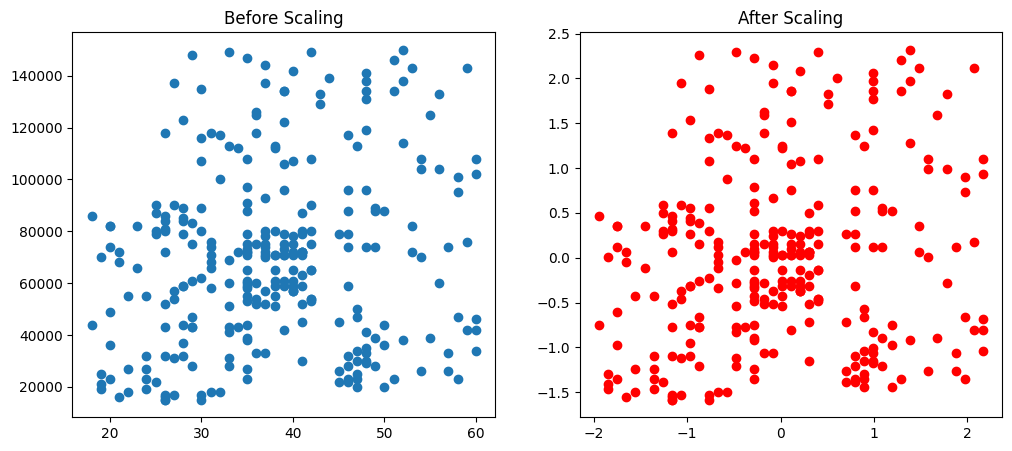

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

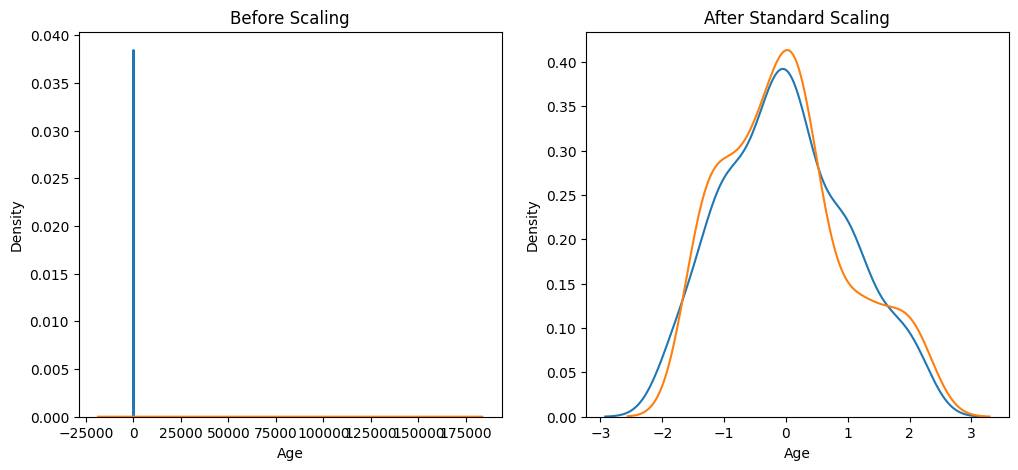

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Comparison of Distributions

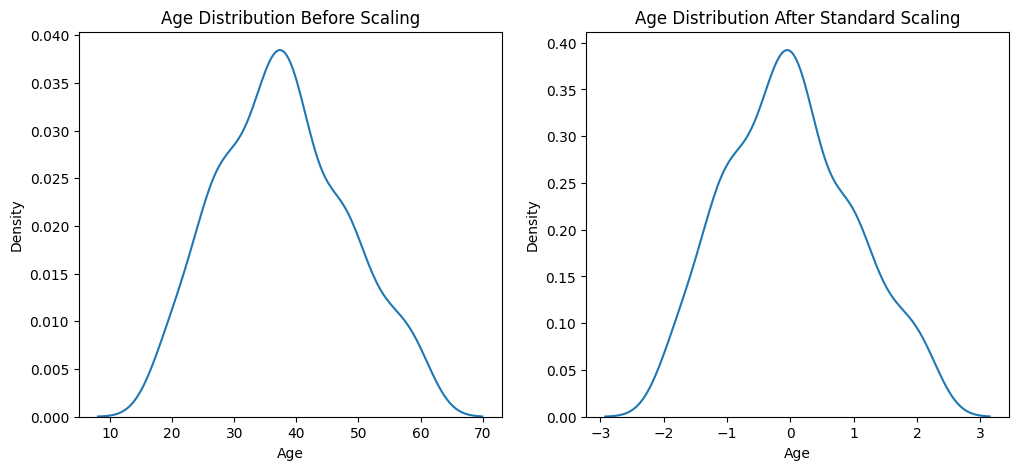

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

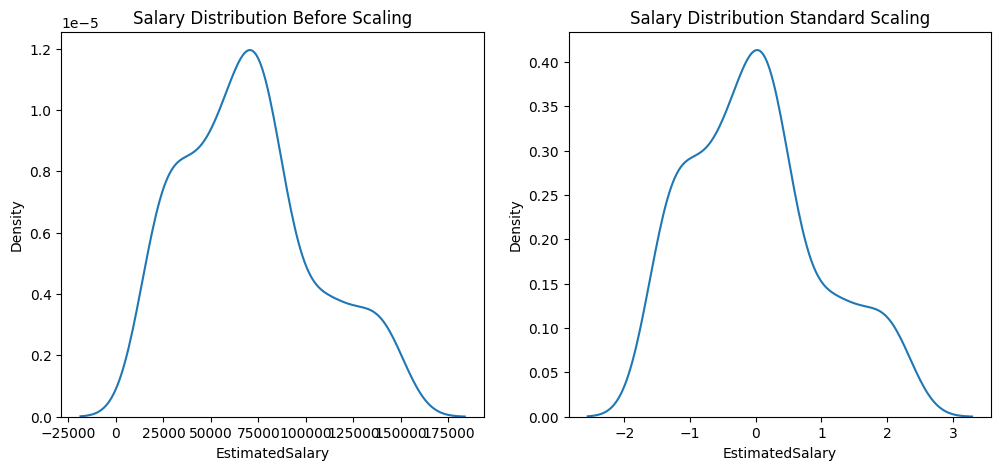

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Why scaling is important?

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [48]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [49]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [50]:
print("Without Scaled =",accuracy_score(y_test,y_pred))
print("Scaled =",accuracy_score(y_test,y_pred_scaled))

Without Scaled = 0.875
Scaled = 0.8666666666666667


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [53]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [54]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [55]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


### Effect of Outlier - Standardization will not have any impact on outliers  

In [69]:
df.describe()

Age  EstimatedSalary   Purchased
count  406.000000       406.000000  406.000000
mean    38.034483     71672.413793    0.362069
std     11.964713     41392.175292    0.481192
min      5.000000      1000.000000    0.000000
25%     29.250000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     95.000000    350000.000000    1.000000

In [73]:
# Data to concatenate
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Use pd.concat() instead of append
df = pd.concat([df, new_data], ignore_index=True)

In [74]:
df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
407   90           250000          1
408   95           350000          1
409    5             1000          0
410   90           250000          1
411   95           350000          1

[412 rows x 3 columns]

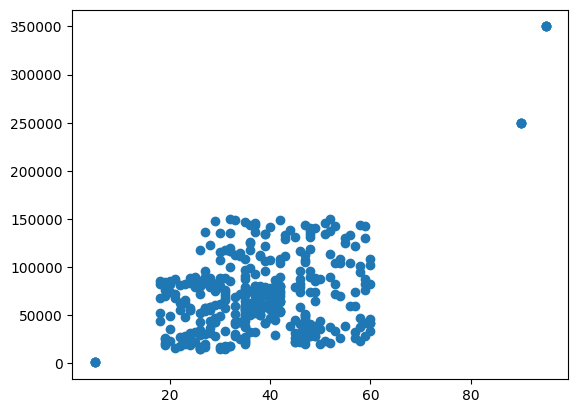

In [75]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((288, 2), (124, 2))

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

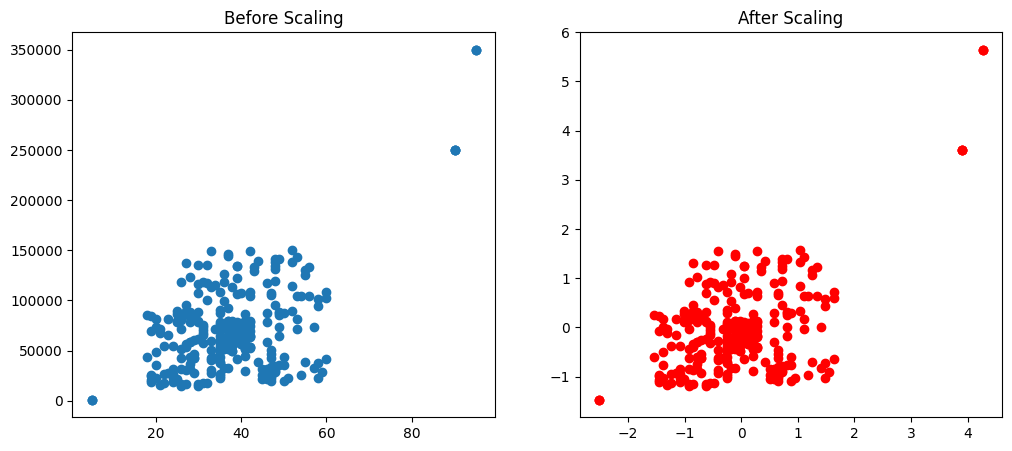

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Scaling - Normalization</p>

In [80]:
df = pd.read_csv('./Datasets/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [81]:
df

Class label  Alcohol  Malic acid
0              1    14.23        1.71
1              1    13.20        1.78
2              1    13.16        2.36
3              1    14.37        1.95
4              1    13.24        2.59
..           ...      ...         ...
173            3    13.71        5.65
174            3    13.40        3.91
175            3    13.27        4.28
176            3    13.17        2.59
177            3    14.13        4.10

[178 rows x 3 columns]

<Axes: xlabel='Alcohol', ylabel='Density'>

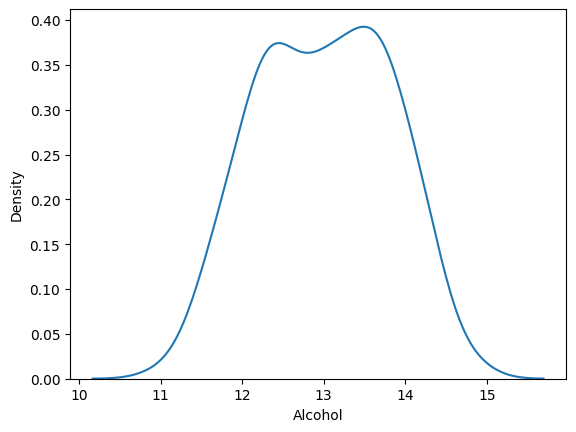

In [82]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

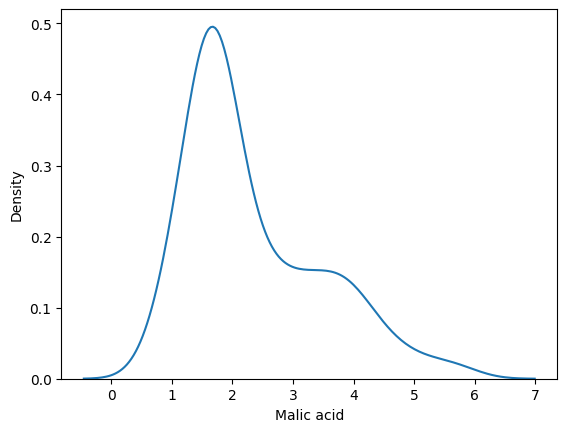

In [83]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

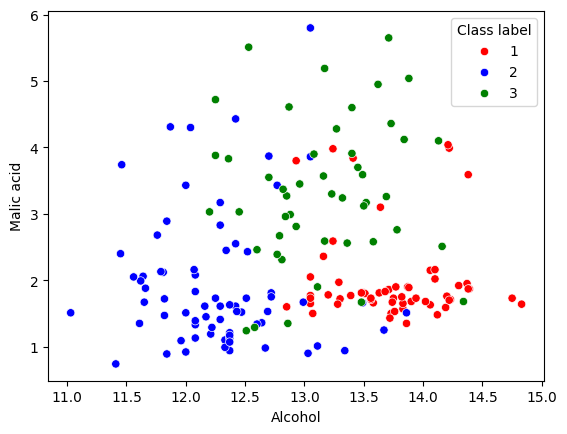

In [87]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [91]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid
count    124.0       124.0
mean      13.0         2.4
std        0.8         1.1
min       11.0         0.9
25%       12.4         1.6
50%       13.0         1.9
75%       13.6         3.2
max       14.8         5.6

In [92]:
np.round(X_train_scaled.describe(), 1)

Alcohol  Malic acid
count    124.0       124.0
mean       0.5         0.3
std        0.2         0.2
min        0.0         0.0
25%        0.4         0.2
50%        0.5         0.2
75%        0.7         0.5
max        1.0         1.0

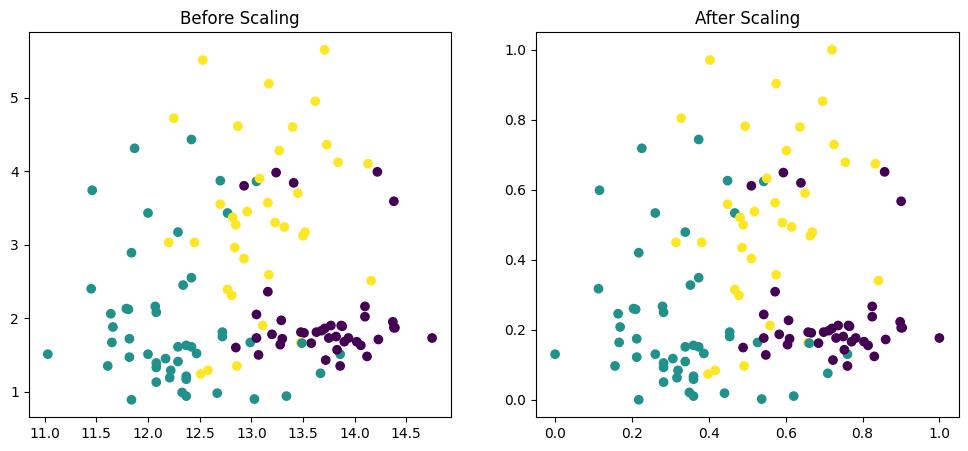

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

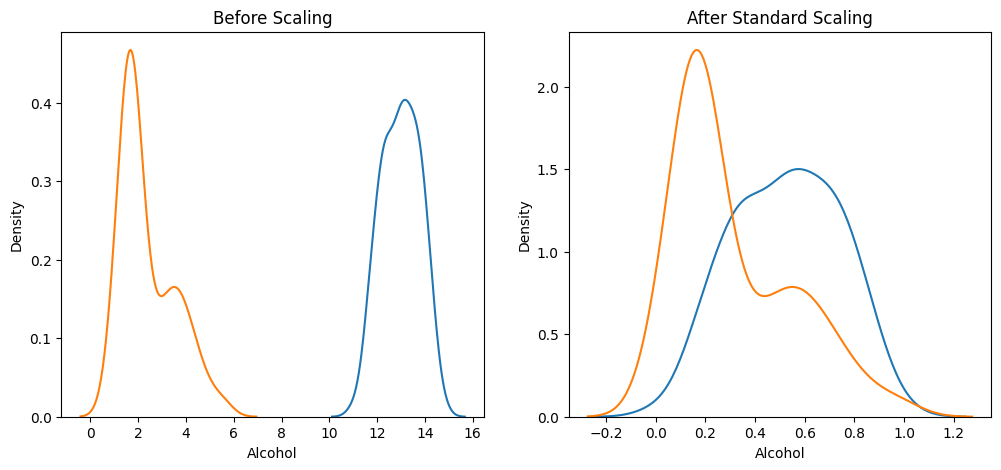

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

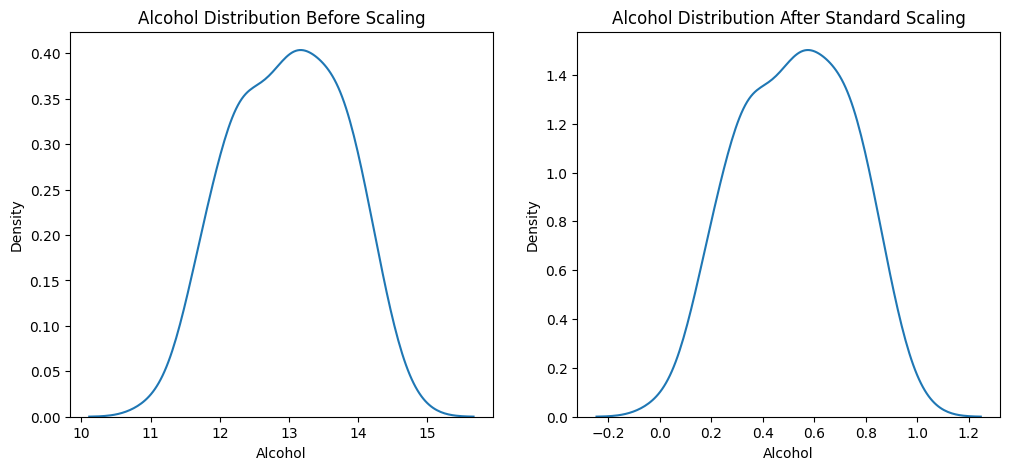

In [96]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

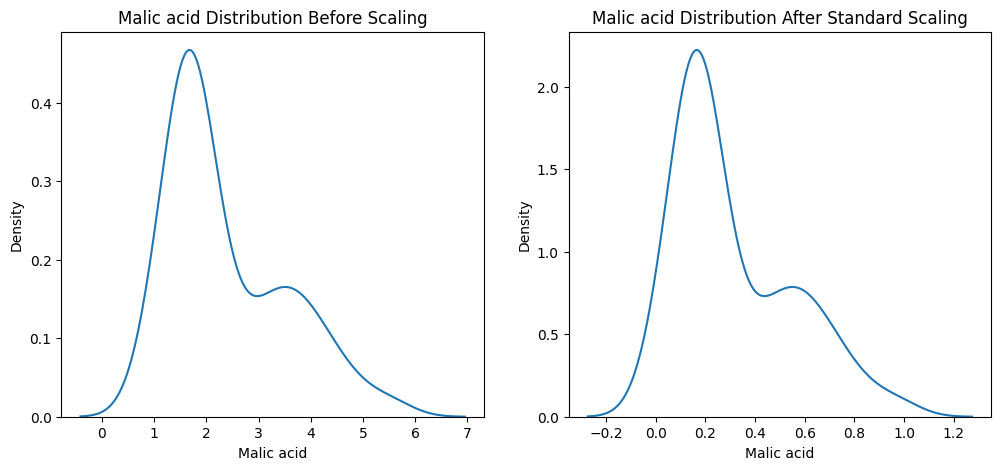

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Encoding Categorical Data (Ordinal) - Ordinal Encoding and Label Encoding</p>

In [46]:
df = pd.read_csv('./Datasets/customer.csv')

In [47]:
df.sample(5)

age  gender   review education purchased
45   61    Male     Poor        PG       Yes
28   48    Male     Poor    School        No
7    60  Female     Poor    School       Yes
23   96  Female     Good    School        No
0    30  Female  Average    School        No

In [48]:
df = df.iloc[:,2:]

In [49]:
df.head()

review education purchased
0  Average    School        No
1     Poor        UG        No
2     Good        PG        No
3     Good        PG        No
4  Average        UG        No

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :2],
                                                    df.iloc[:, -1],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((35, 2), (15, 2))

In [52]:
X_train

review education
7      Poor    School
14     Poor        PG
45     Poor        PG
48     Good        UG
29  Average        UG
15     Poor        UG
30  Average        UG
32  Average        UG
16     Poor        UG
42     Good        PG
20  Average    School
43     Poor        PG
8   Average        UG
13  Average    School
25     Good    School
5   Average    School
17     Poor        UG
40     Good    School
49     Good        UG
1      Poor        UG
12     Poor    School
37  Average        PG
24  Average        PG
6      Good    School
23     Good    School
36     Good        UG
21  Average        PG
19     Poor        PG
9      Good        UG
39     Poor        PG
46     Poor        PG
3      Good        PG
0   Average    School
47     Good        PG
44  Average        UG

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [55]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [56]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [57]:
X_train

array([[0., 0.],
       [0., 2.],
       [0., 2.],
       [2., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [2., 2.],
       [1., 0.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [1., 2.],
       [1., 2.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [1., 2.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [1., 1.]])

In [58]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
le.fit(y_train)

LabelEncoder()

In [62]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [63]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [64]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Encoding Categorical Data (Nominal) - One-Hot Encoding</p>

In [65]:
df = pd.read_csv('./Datasets/cars.csv')

In [66]:
df.head()

brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

In [69]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

### 1. OneHotEncoding using Pandas

In [70]:
pd.get_dummies(df,columns=['fuel','owner'])

brand  km_driven  selling_price  fuel_CNG  fuel_Diesel  fuel_LPG  \
0      Maruti     145500         450000         0            1         0   
1       Skoda     120000         370000         0            1         0   
2       Honda     140000         158000         0            0         0   
3     Hyundai     127000         225000         0            1         0   
4      Maruti     120000         130000         0            0         0   
...       ...        ...            ...       ...          ...       ...   
8123  Hyundai     110000         320000         0            0         0   
8124  Hyundai     119000         135000         0            1         0   
8125   Maruti     120000         382000         0            1         0   
8126     Tata      25000         290000         0            1         0   
8127     Tata      25000         290000         0            1         0   

      fuel_Petrol  owner_First Owner  owner_Fourth & Above Owner  \
0               0                  1                           0   
1               0                  0                           0   
2               1                  0                           0   
3               0                  1                           0   
4               1                  1                           0   
...           ...                ...                         ...   
8123            1                  1                           0   
8124            0                  0                           1   
8125            0                  1                           0   
8126            0                  1                           0   
8127            0                  1                           0   

      owner_Second Owner  owner_Test Drive Car  owner_Third Owner  
0                      0                     0                  0  
1                      1                     0                  0  
2                      0                     0                  1  
3                      0                     0                  0  
4                      0                     0                  0  
...                  ...                   ...                ...  
8123                   0                     0                  0  
8124                   0                     0                  0  
8125                   0                     0                  0  
8126                   0                     0                  0  
8127                   0                     0                  0  

[8128 rows x 12 columns]

### 2. Dummy Encoding using Pandas

In [72]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

brand  km_driven  selling_price  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0      Maruti     145500         450000            1         0            0   
1       Skoda     120000         370000            1         0            0   
2       Honda     140000         158000            0         0            1   
3     Hyundai     127000         225000            1         0            0   
4      Maruti     120000         130000            0         0            1   
...       ...        ...            ...          ...       ...          ...   
8123  Hyundai     110000         320000            0         0            1   
8124  Hyundai     119000         135000            1         0            0   
8125   Maruti     120000         382000            1         0            0   
8126     Tata      25000         290000            1         0            0   
8127     Tata      25000         290000            1         0            0   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                              0                   0                     0   
1                              0                   1                     0   
2                              0                   0                     0   
3                              0                   0                     0   
4                              0                   0                     0   
...                          ...                 ...                   ...   
8123                           0                   0                     0   
8124                           1                   0                     0   
8125                           0                   0                     0   
8126                           0                   0                     0   
8127                           0                   0                     0   

      owner_Third Owner  
0                     0  
1                     0  
2                     1  
3                     0  
4                     0  
...                 ...  
8123                  0  
8124                  0  
8125                  0  
8126                  0  
8127                  0  

[8128 rows x 10 columns]

### 3. OneHotEncoding using Sklearn

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [74]:
X_train.head()

brand  km_driven    fuel         owner
5571   Hyundai      35000  Diesel   First Owner
2038      Jeep      60000  Diesel   First Owner
2957   Hyundai      25000  Petrol   First Owner
7618  Mahindra     130000  Diesel  Second Owner
6684   Hyundai     155000  Diesel   First Owner

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [79]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [80]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [81]:
X_train_new.shape

(6502, 7)

In [82]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

### 4. OneHotEncoding with Top Categories

In [83]:
counts = df['brand'].value_counts()

In [84]:
df['brand'].nunique()
threshold = 100

In [85]:
repl = counts[counts <= threshold].index

In [88]:
pd.get_dummies(df['brand'].replace(repl, 'Uncommon')).sample(5)

BMW  Chevrolet  Ford  Honda  Hyundai  Mahindra  Maruti  Renault  Skoda  \
1931    0          0     0      0        1         0       0        0      0   
6104    0          0     0      0        0         0       0        0      0   
4238    0          0     0      0        0         0       0        0      0   
1434    0          0     0      1        0         0       0        0      0   
1030    0          0     0      0        1         0       0        0      0   

      Tata  Toyota  Uncommon  Volkswagen  
1931     0       0         0           0  
6104     0       0         1           0  
4238     0       0         1           0  
1434     0       0         0           0  
1030     0       0         0           0

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Column Transformer</p>

In [89]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [90]:
df = pd.read_csv('./datasets/covid_toy.csv')

In [91]:
df.head()

age  gender  fever cough     city has_covid
0   60    Male  103.0  Mild  Kolkata        No
1   27    Male  100.0  Mild    Delhi       Yes
2   42    Male  101.0  Mild    Delhi        No
3   31  Female   98.0  Mild  Kolkata        No
4   65  Female  101.0  Mild   Mumbai        No

In [92]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [94]:
X_train

age  gender  fever   cough       city
61   81  Female   98.0  Strong     Mumbai
57   49  Female   99.0  Strong  Bangalore
80   14  Female   99.0    Mild     Mumbai
35   82  Female  102.0  Strong  Bangalore
71   75  Female  104.0  Strong      Delhi
..  ...     ...    ...     ...        ...
45   72    Male   99.0    Mild  Bangalore
14   51    Male  104.0    Mild  Bangalore
81   65    Male   99.0    Mild      Delhi
12   25  Female   99.0  Strong    Kolkata
56   71    Male    NaN  Strong    Kolkata

[80 rows x 5 columns]

### Aam Zindagi - Jisme differen methods different columns me alag alag appy karke add karte h

In [96]:
# adding simple imputer to fever col
si = SimpleImputer(strategy='mean')
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [97]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [100]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [101]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [102]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

### Mentos Zindagi - Jisme differen methods different columns ke liye column transformer ka use karte h

In [103]:
from sklearn.compose import ColumnTransformer

In [104]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(strategy='mean'),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [105]:
transformer.fit_transform(X_train).shape

(80, 7)

In [106]:
transformer.transform(X_test).shape

(20, 7)

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Sklearn Pipelines</p>

### Training Without Pipeline 

In [129]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [130]:
df = pd.read_csv('./Datasets/titanic_train.csv')

In [131]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [132]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [133]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [134]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [135]:
X_train.head(2)

Pclass   Sex   Age  SibSp  Parch  Fare Embarked
331       1  male  45.5      0      0  28.5        S
733       2  male  23.0      0      0  13.0        S

In [136]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [137]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [138]:
# Applying imputation
si_age = SimpleImputer()
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [139]:
X_train_embarked

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [140]:
# one hot encoding Sex and Embarked
ohe_sex = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)

In [141]:
X_train_embarked

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [142]:
X_train.head(2)

Pclass   Sex   Age  SibSp  Parch  Fare Embarked
331       1  male  45.5      0      0  28.5        S
733       2  male  23.0      0      0  13.0        S

In [143]:
X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])

In [144]:
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

In [145]:
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [146]:
X_test_transformed.shape

(179, 10)

In [147]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [148]:
y_pred = clf.predict(X_test_transformed)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

In [150]:
import pickle

In [153]:
pickle.dump(ohe_sex,open('Models/ohe_sex.pkl','wb'))
pickle.dump(ohe_embarked,open('Models/ohe_embarked.pkl','wb'))
pickle.dump(clf,open('Models/clf.pkl','wb'))

### Prediction Without Pipline

In [154]:
import pickle
import numpy as np

In [155]:
ohe_sex = pickle.load(open('Models/ohe_sex.pkl','rb'))
ohe_embarked = pickle.load(open('Models/ohe_embarked.pkl','rb'))
clf = pickle.load(open('Models/clf.pkl','rb'))

In [156]:
# Assume user input
# Pclass/gender/age/SibSp/Parch/Fare/Embarked
test_input = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)

In [157]:
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [158]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [159]:
test_input_sex

array([[0., 1.]])

In [160]:
test_input_embarked = ohe_embarked.transform(test_input[:,-1].reshape(1,1))

In [161]:
test_input_embarked

array([[0., 0., 1.]])

In [162]:
test_input_age = test_input[:,2].reshape(1,1)

In [163]:
test_input_transformed = np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)

In [164]:
test_input_transformed.shape

(1, 10)

In [165]:
clf.predict(test_input_transformed)

array([1], dtype=int64)

### Training Using Pipeline

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [166]:
df = pd.read_csv('./Datasets/titanic_train.csv')

In [167]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [168]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [169]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [170]:
X_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
331       1    male  45.5      0      0  28.5000        S
733       2    male  23.0      0      0  13.0000        S
382       3    male  32.0      0      0   7.9250        S
704       3    male  26.0      1      0   7.8542        S
813       3  female   6.0      4      2  31.2750        S

In [171]:
y_train.sample(5)

752    0
245    0
61     1
288    1
228    0
Name: Survived, dtype: int64

#### Make functions or Strategy
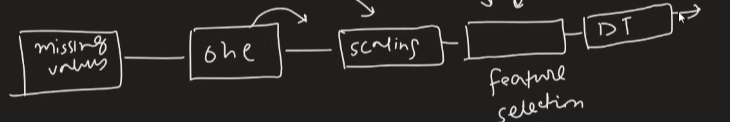

In [172]:
# imputation transformer
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')


In [174]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [175]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [178]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [179]:
# train the model
trf5 = DecisionTreeClassifier()

#### Create Pipeline

In [182]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

#### Pipeline Vs make_pipeline

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [181]:
# Alternate Syntax
# pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [184]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x000001EEB6CC7760>)),
                ('trf5', DecisionTreeClassifier())])

#### Explore the Pipeline

In [185]:
# Code here
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x000001EEB6CC7760>),
 'trf5': DecisionTreeClassifier()}

In [194]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_

array([29.49884615])

In [198]:
pipe.named_steps['trf2'].transformers_[0][1].categories_[0]

array(['C', 'Q', 'S'], dtype=object)

In [199]:
# Predict
y_pred = pipe.predict(X_test)

In [200]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

#### Cross Validation using Pipeline

In [202]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6391214419383433

#### GridSearch using Pipeline

In [203]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [204]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x000001EEB6CC7760>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [205]:
grid.best_score_

0.6391214419383433

In [206]:
grid.best_params_

{'trf5__max_depth': 2}

#### Exporting the Pipeline

In [207]:
# export 
import pickle
pickle.dump(pipe,open('Models/pipe.pkl','wb'))

### Prediction Using Pipeline

In [208]:
import pickle
import numpy as np

In [209]:
pipe = pickle.load(open('Models/pipe.pkl','rb'))

In [210]:
# Assume user input
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)

In [211]:
pipe.predict(test_input2)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Transformation - Mathematical Transformers</p>

*We can handle skewed data using mathematical transformers. I will discuss some of the best transformers that sklearn library
provides us in order to handle skewed data. There are various types of Mathematical Transformers:*

* **Function Transformers** (Check by hit & trial method)
 - Log Transform (For right skewed data)
 - Reciprocal Transform (For left skewed data)
 - Square Transform (You can try)
 - Sq Root Transform (You can try)
 - Custom Transform (You can try)
* **Power Transformers**
 - Box-Cox (Work good for all type of skewed but cannot be used for negative values and 0)
 - Yeo-Johnson (Work good for all type of skewed)
* **Quantile Transformer**

#### **Function Transformers**

In [212]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [214]:
df = pd.read_csv('./Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [215]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [216]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [217]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [218]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [219]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

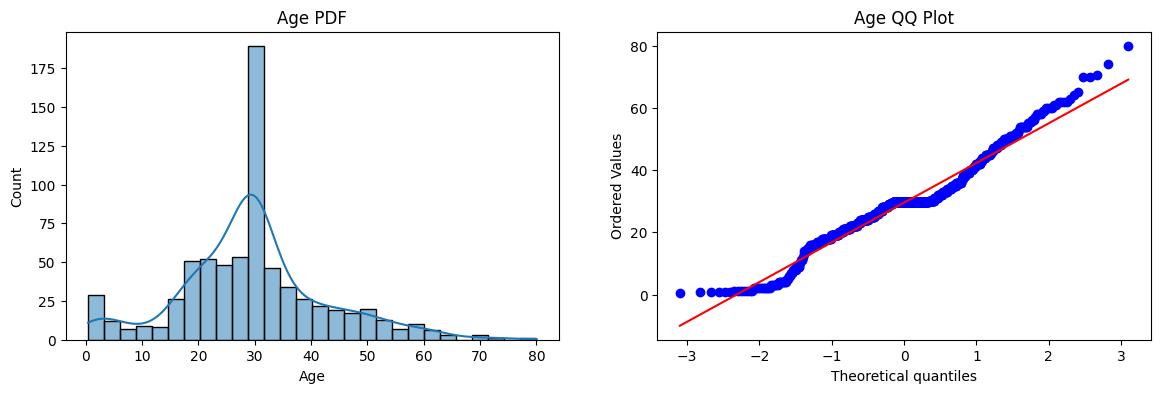

In [221]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x=X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

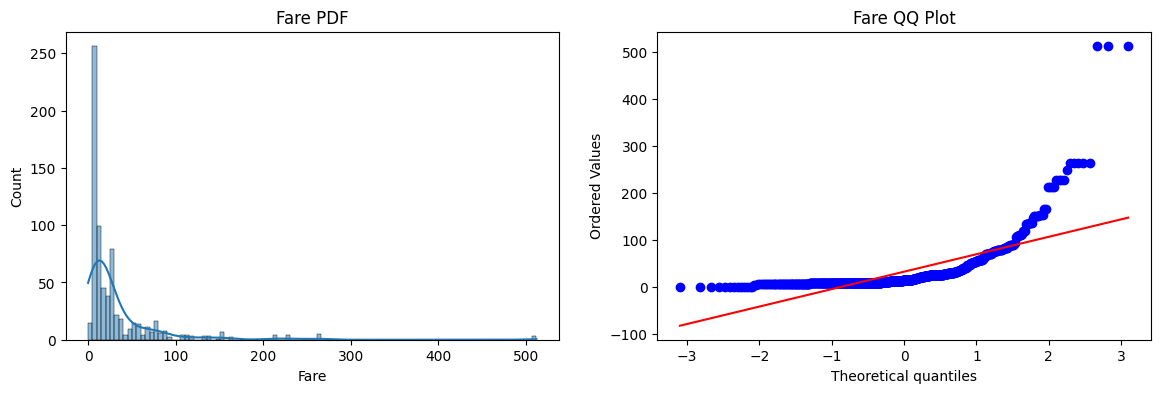

In [222]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x=X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [224]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [225]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [226]:
trf = FunctionTransformer(func=np.log1p)

In [227]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [228]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [229]:
# validation using cross validation
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610736579275905


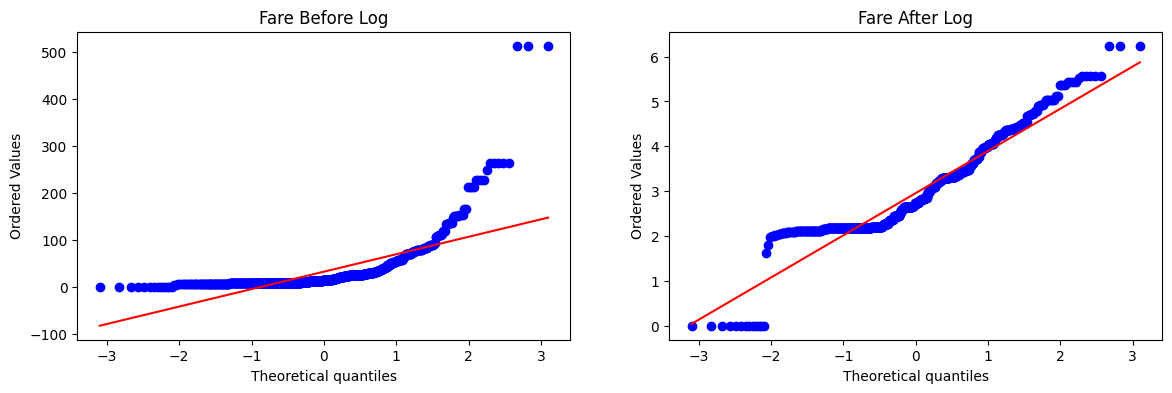

In [230]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

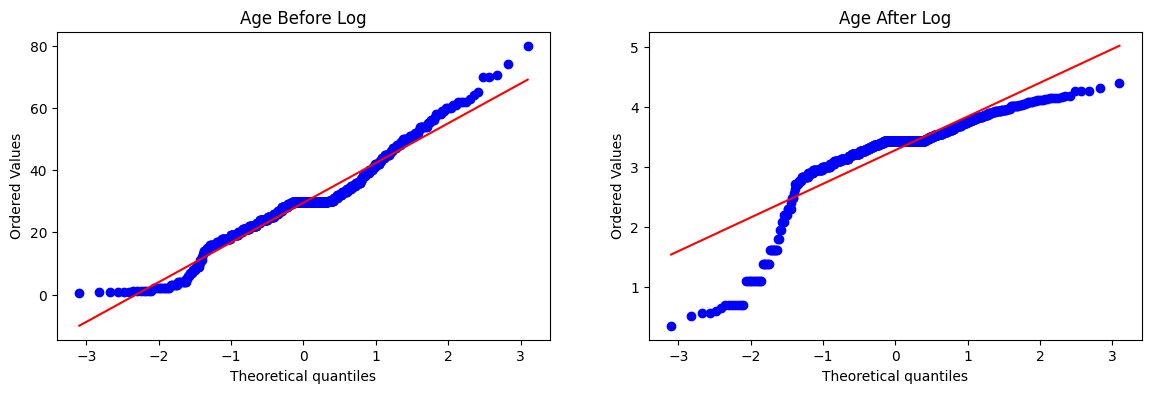

In [231]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

Applying transformation only on Fare column

In [232]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [233]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [234]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599500624219725


In [235]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6431335830212235


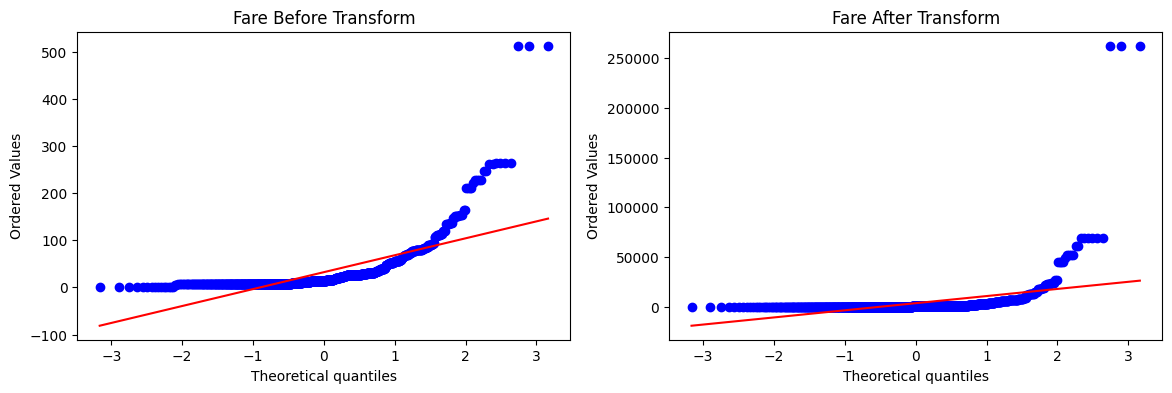

In [245]:
# apply_transform(np.sin)
apply_transform(lambda x: x**2)

#### **Power Transformers**

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [248]:
df = pd.read_csv('./Datasets/concrete_data.csv')

In [249]:
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [250]:
df.shape

(1030, 9)

In [251]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [252]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [253]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [255]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314848

In [257]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662864

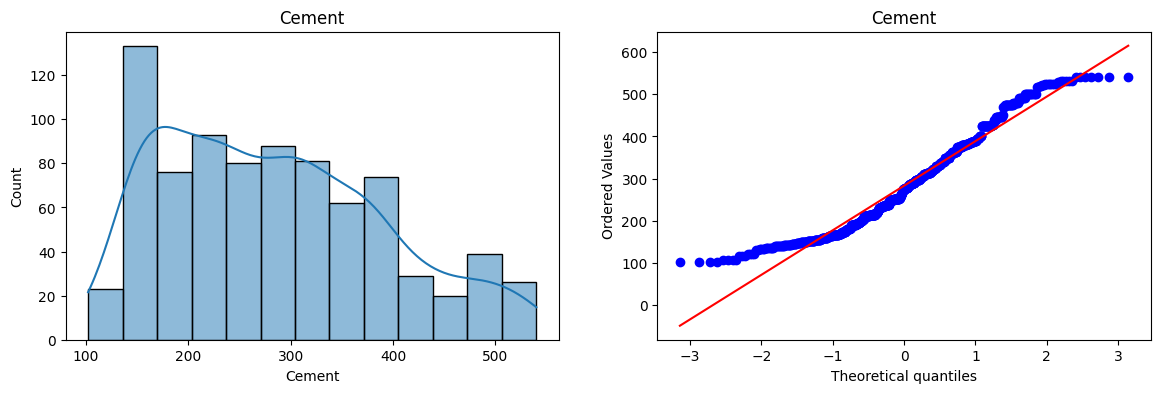

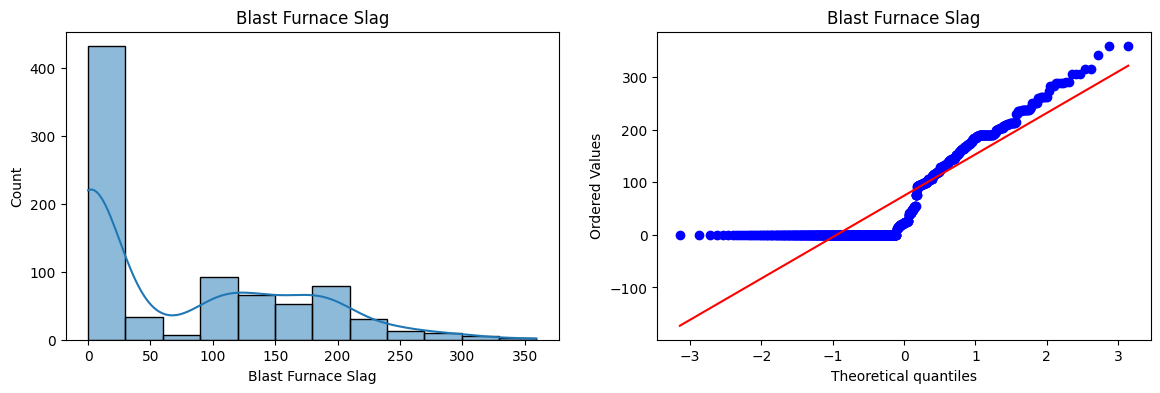

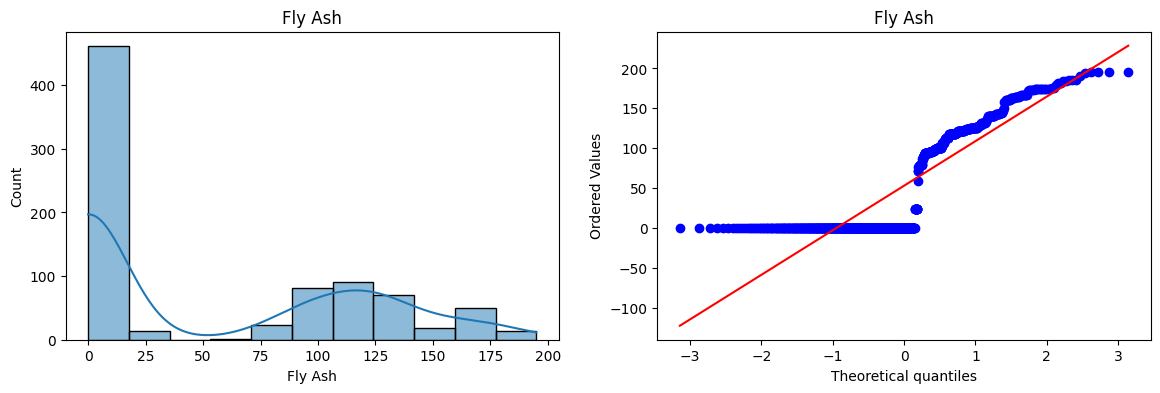

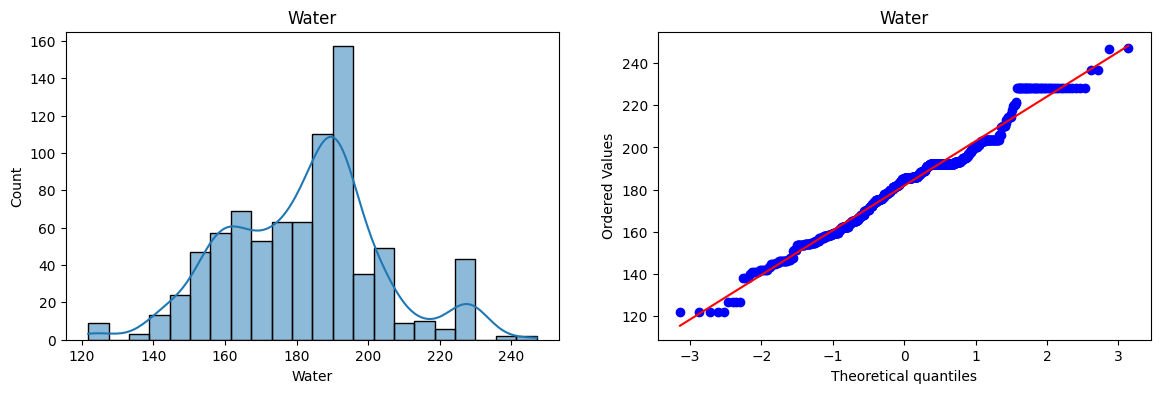

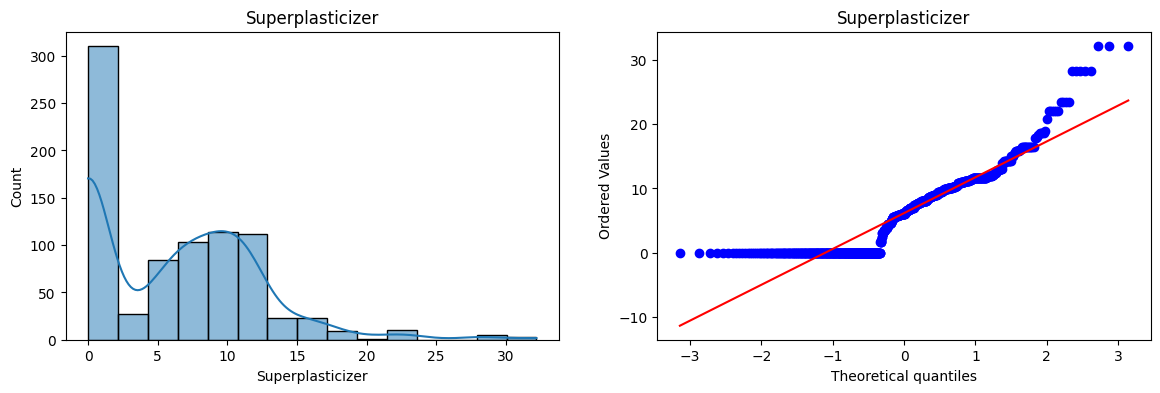

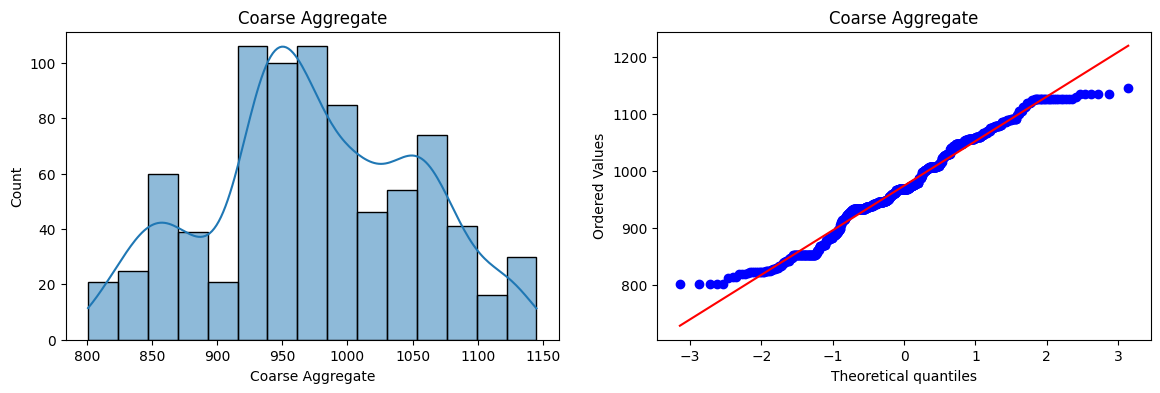

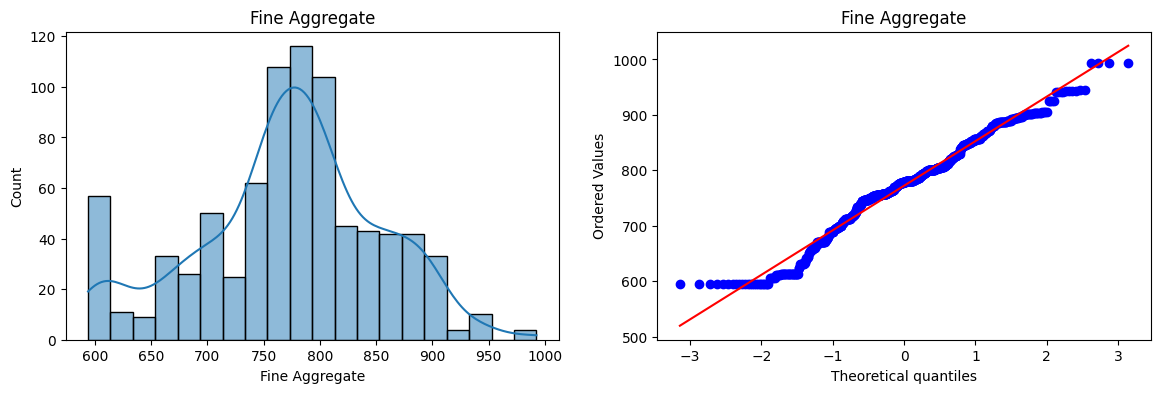

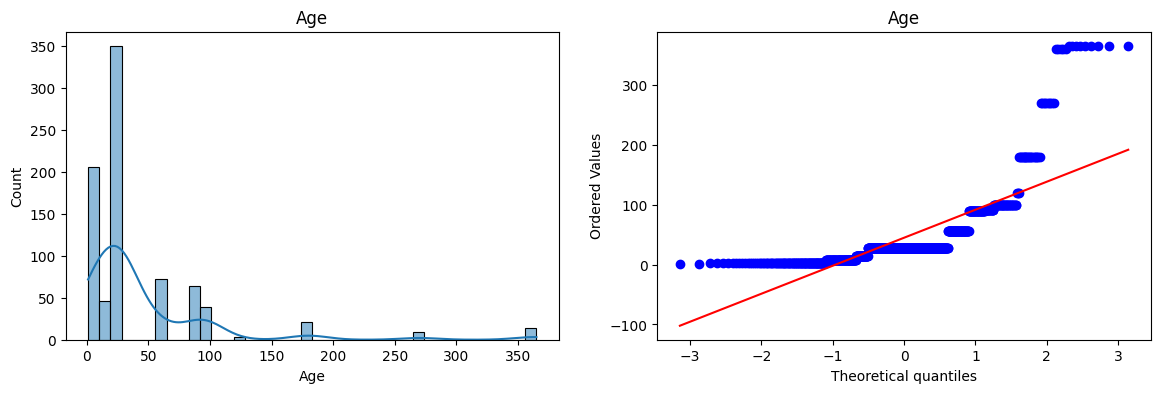

In [258]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [259]:
# Applying Box-Cox Transform
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0              Cement         0.177025
1  Blast Furnace Slag         0.025093
2             Fly Ash        -0.038970
3               Water         0.772682
4    Superplasticizer         0.098811
5    Coarse Aggregate         1.129813
6      Fine Aggregate         1.782018
7                 Age         0.066631

In [260]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825005397713

In [261]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537947024267

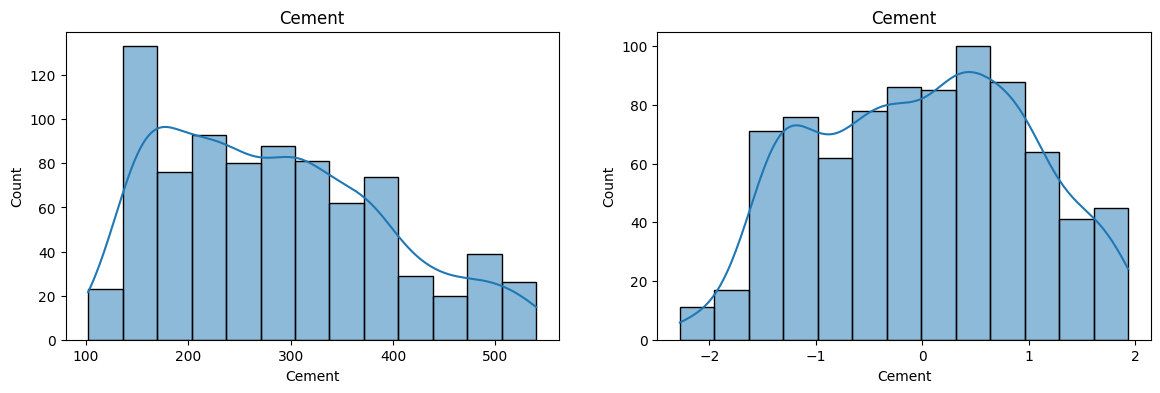

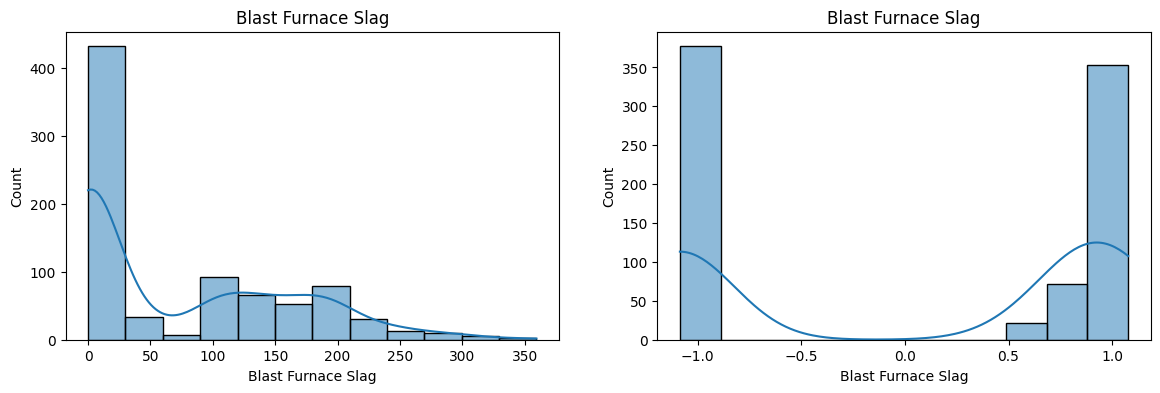

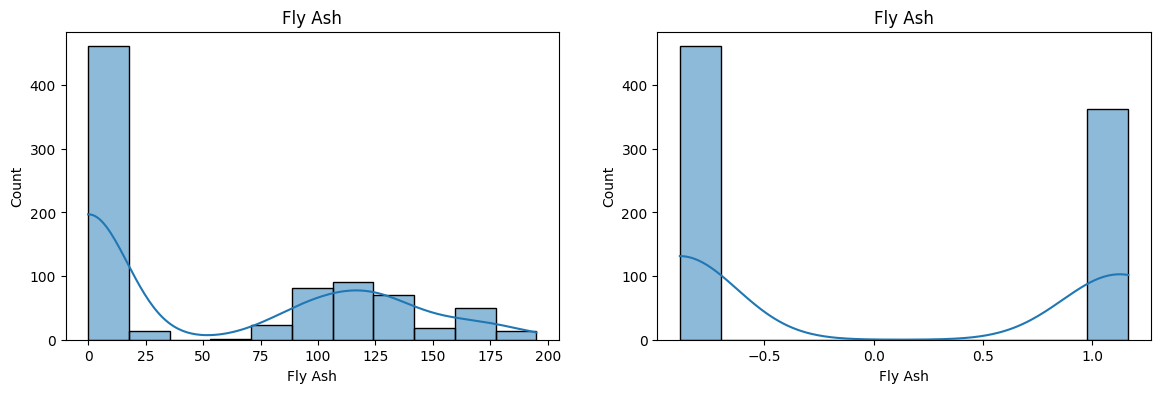

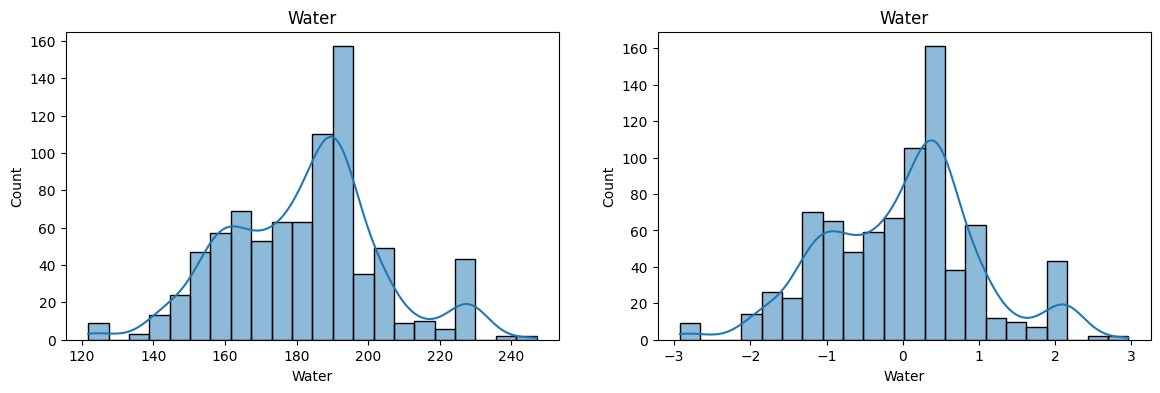

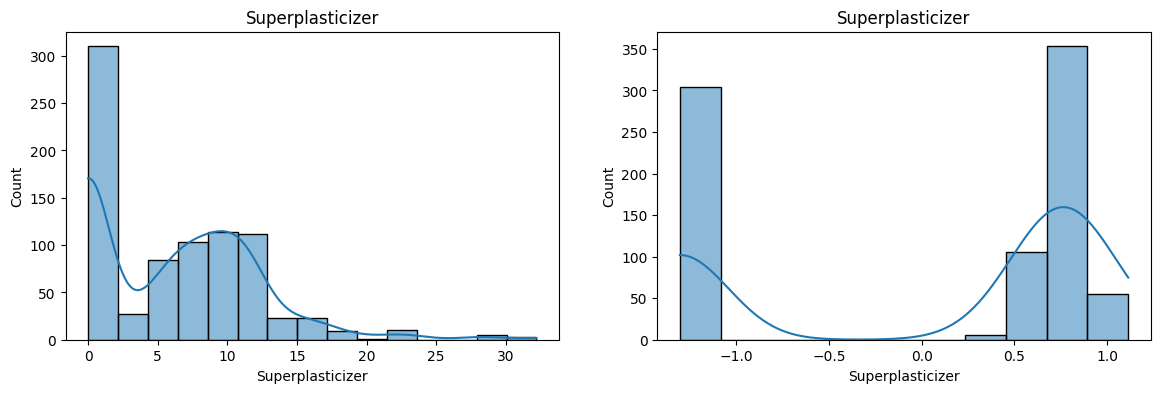

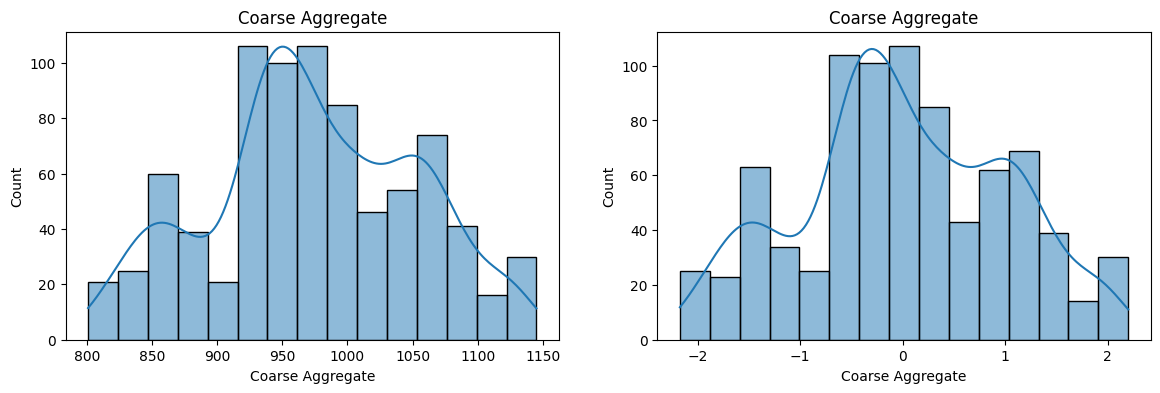

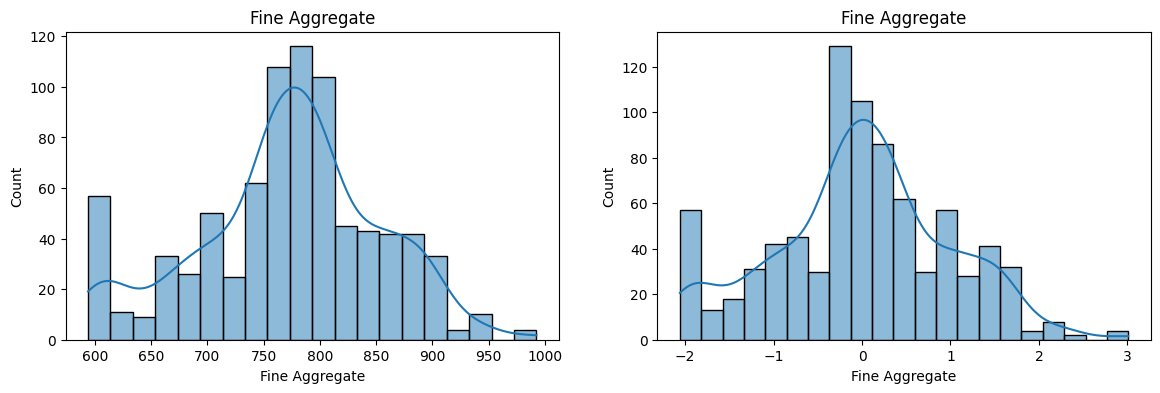

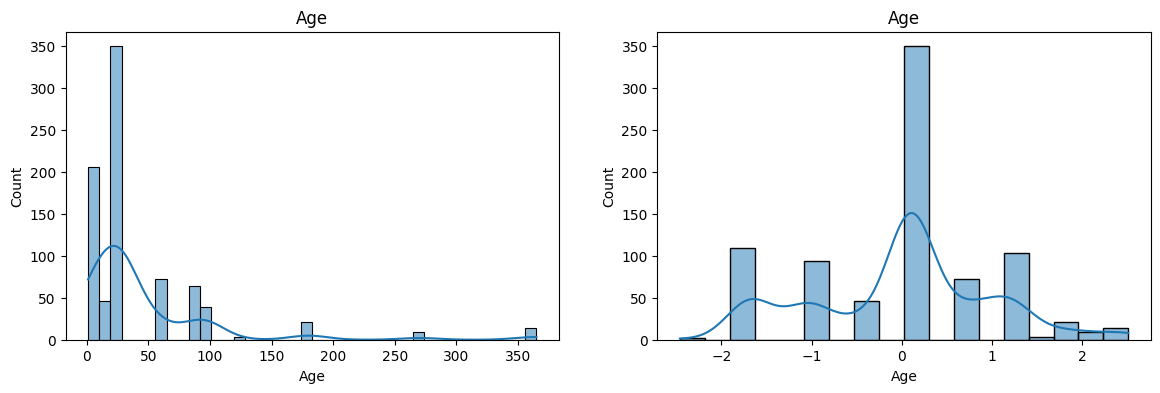

In [262]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x=X_train_transformed[col], kde=True)
    plt.title(col)

    plt.show()

In [263]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})


0.8161906513339304


cols  Yeo_Johnson_lambdas
0              Cement             0.174348
1  Blast Furnace Slag             0.015715
2             Fly Ash            -0.161447
3               Water             0.771307
4    Superplasticizer             0.253935
5    Coarse Aggregate             1.130050
6      Fine Aggregate             1.783100
7                 Age             0.019885

In [264]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625134285748

In [265]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

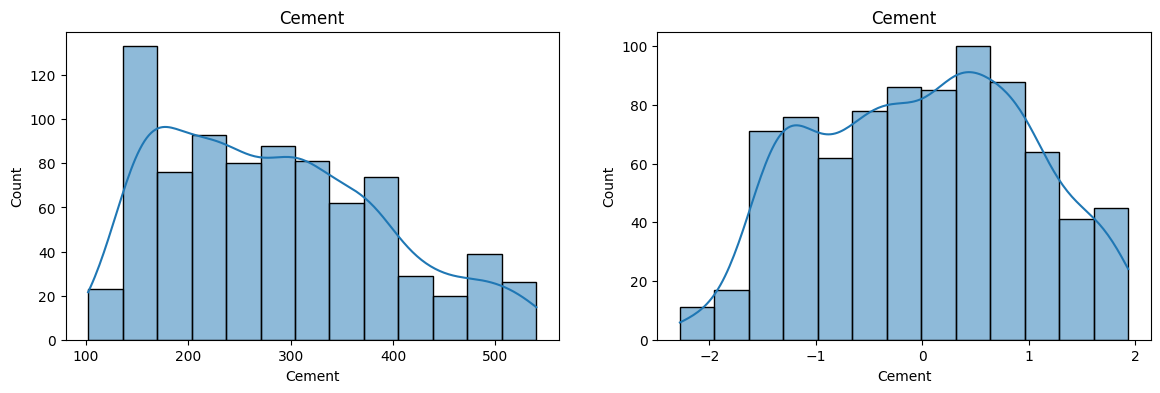

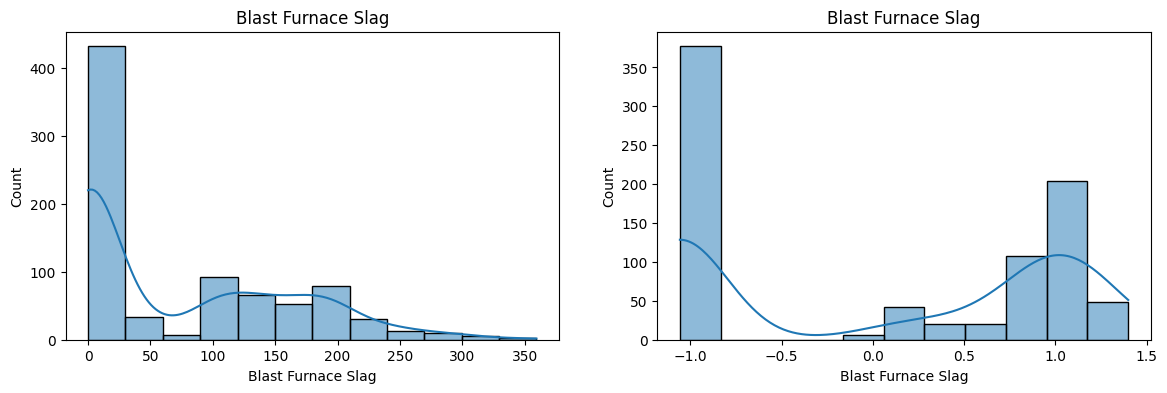

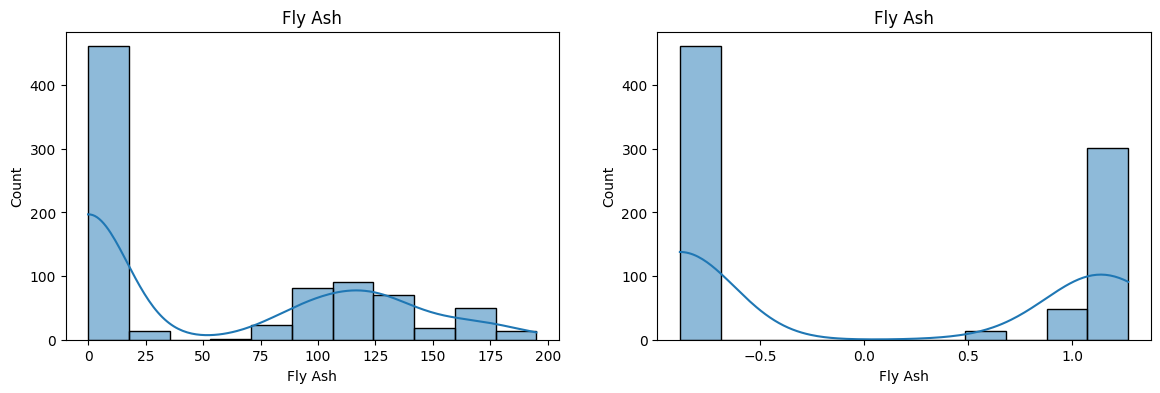

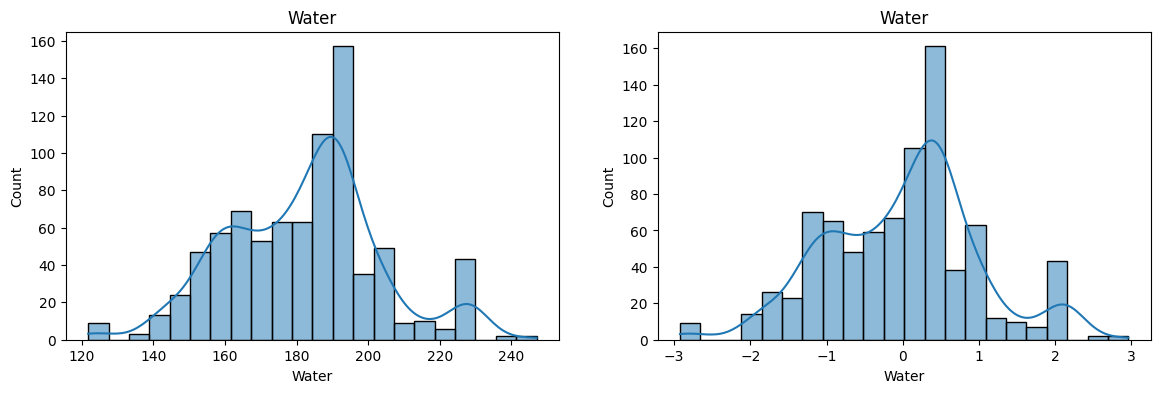

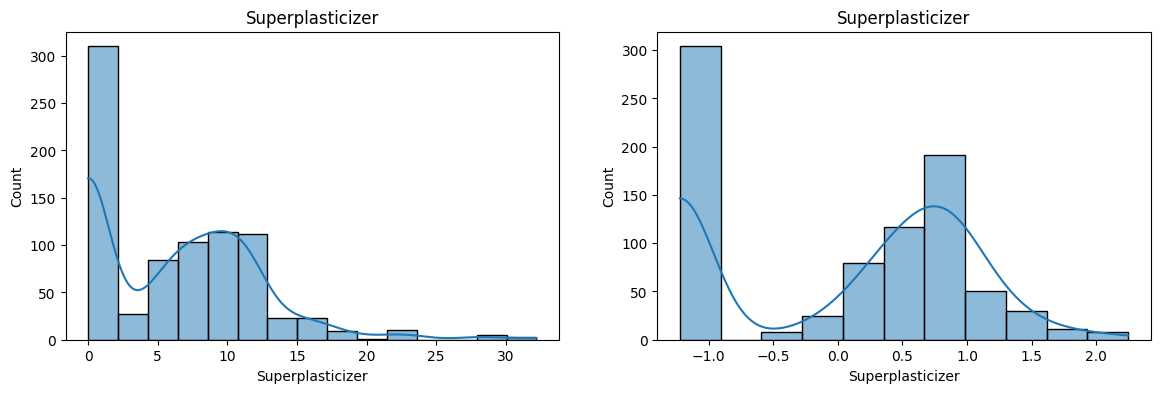

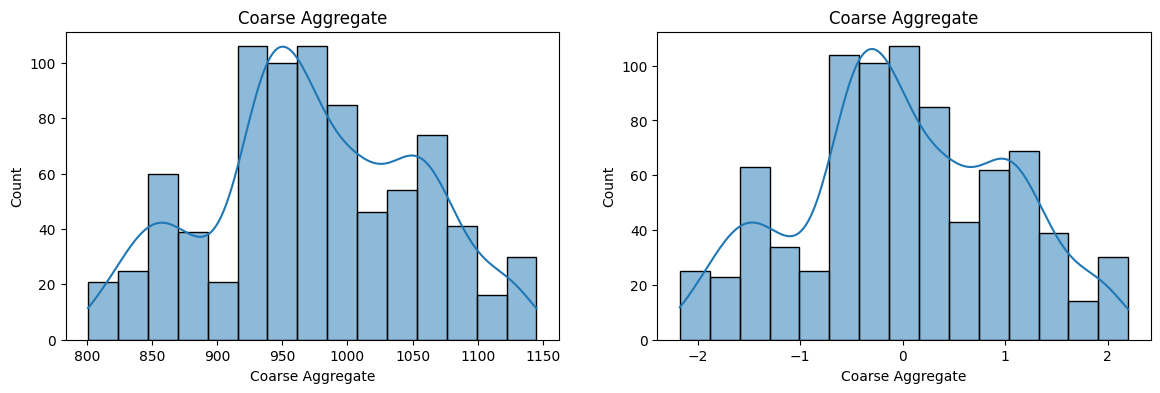

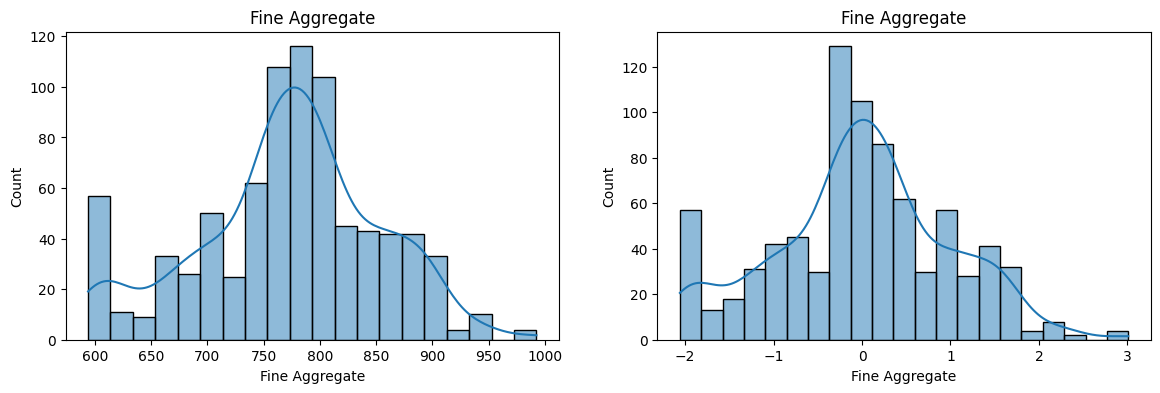

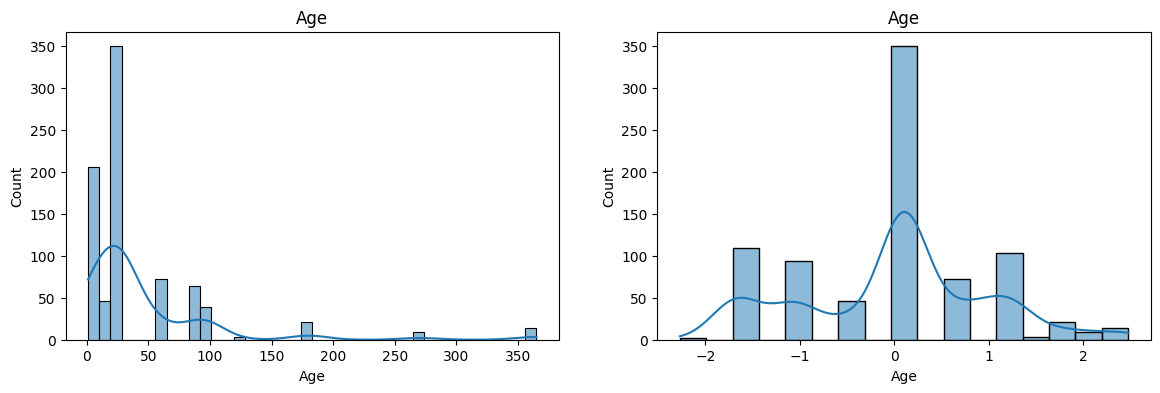

In [266]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x=X_train_transformed2[col], kde=True)
    plt.title(col)

    plt.show()

In [267]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

cols  box_cox_lambdas  Yeo_Johnson_lambdas
0              Cement         0.169544             0.174348
1  Blast Furnace Slag         0.016633             0.015715
2             Fly Ash        -0.136480            -0.161447
3               Water         0.808438             0.771307
4    Superplasticizer         0.264160             0.253935
5    Coarse Aggregate         1.129395             1.130050
6      Fine Aggregate         1.830763             1.783100
7                 Age         0.001771             0.019885

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Transformation  - Binning (Discretization) and Binarization </p>

### Binning

In [268]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [269]:
df = pd.read_csv('./Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [270]:
df.dropna(inplace=True)

In [271]:
df.shape

(714, 3)

In [272]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [273]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [274]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [275]:
X_train.head(2)

Age     Fare
328  31.0  20.5250
73   26.0  14.4542

In [276]:

clf = DecisionTreeClassifier()

In [277]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [278]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [279]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6288928012519562

In [280]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile') # strategy: Literal['uniform', 'quantile', 'kmeans']
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile') # strategy: Literal['uniform', 'quantile', 'kmeans']

In [281]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [282]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [286]:
trf.named_transformers_['first'].n_bins_

array([15])

In [284]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [289]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [290]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [291]:
output.sample(5)

age  age_trf      fare  fare_trf    age_labels       fare_labels
80   22.0      4.0    9.0000       4.0  (21.0, 23.0]     (8.158, 10.5]
478  22.0      4.0    7.5208       1.0  (21.0, 23.0]     (7.25, 7.775]
393  23.0      5.0  113.2750      14.0  (21.0, 23.0]  (108.9, 512.329]
408  21.0      4.0    7.7750       2.0  (19.0, 21.0]     (7.25, 7.775]
627  21.0      4.0   77.9583      13.0  (19.0, 21.0]   (76.292, 108.9]

In [292]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [293]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [294]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6317292644757433

In [297]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Age Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("Age After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Fare Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare After")

    plt.show()
    

0.6331181533646323


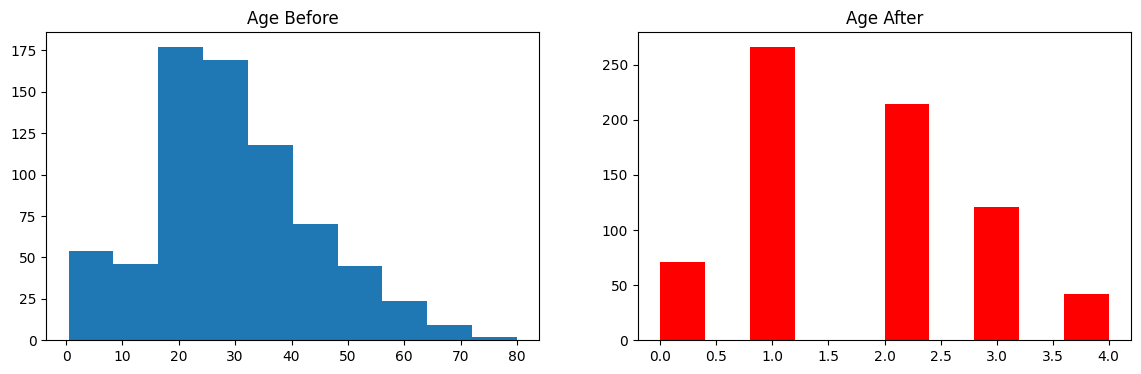

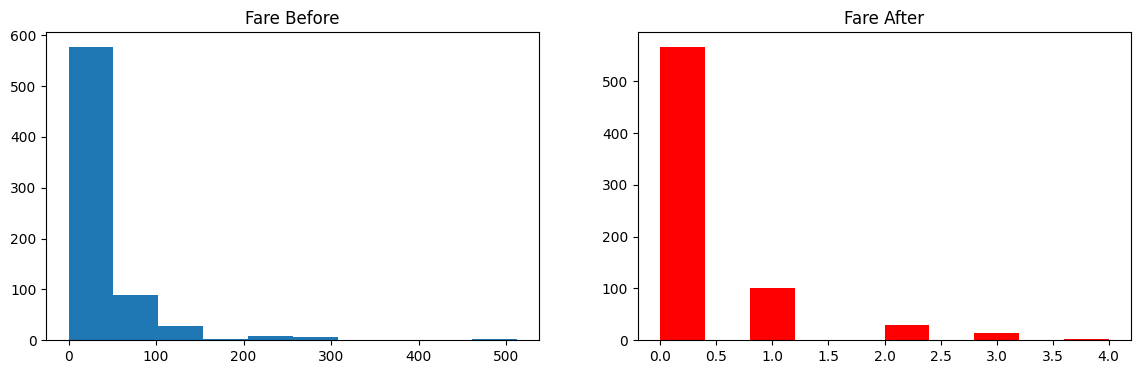

In [298]:
discretize(5,'kmeans') # strategy: Literal['uniform', 'quantile', 'kmeans']

### Binarization

In [299]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [302]:
df = pd.read_csv('./Datasets/titanic_train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [303]:
df.dropna(inplace=True)

In [304]:
df.head()

Age     Fare  SibSp  Parch  Survived
0  22.0   7.2500      1      0         0
1  38.0  71.2833      1      0         1
2  26.0   7.9250      0      0         1
3  35.0  53.1000      1      0         1
4  35.0   8.0500      0      0         0

In [305]:
df['family'] = df['SibSp'] + df['Parch']

In [306]:
df.head()

Age     Fare  SibSp  Parch  Survived  family
0  22.0   7.2500      1      0         0       1
1  38.0  71.2833      1      0         1       1
2  26.0   7.9250      0      0         1       0
3  35.0  53.1000      1      0         1       1
4  35.0   8.0500      0      0         0       0

In [307]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [308]:
df.head()

Age     Fare  Survived  family
0  22.0   7.2500         0       1
1  38.0  71.2833         1       1
2  26.0   7.9250         1       0
3  35.0  53.1000         1       1
4  35.0   8.0500         0       0

In [309]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [310]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [311]:
X_train.head()

Age     Fare  family
328  31.0  20.5250       2
73   26.0  14.4542       1
253  30.0  16.1000       1
719  33.0   7.7750       0
666  25.0  13.0000       0

In [317]:
# Without binarization
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6293706293706294

In [318]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6470852895148671

In [319]:
# Applying Binarization
from sklearn.preprocessing import Binarizer

In [320]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False, threshold=0),['family'])
],remainder='passthrough')

In [321]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [322]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

family   Age      Fare
0       1.0  31.0   20.5250
1       1.0  26.0   14.4542
2       1.0  30.0   16.1000
3       0.0  33.0    7.7750
4       0.0  25.0   13.0000
..      ...   ...       ...
566     1.0  46.0   61.1750
567     0.0  25.0   13.0000
568     0.0  41.0  134.5000
569     1.0  33.0   20.5250
570     0.0  33.0    7.8958

[571 rows x 3 columns]

In [323]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6083916083916084

In [324]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6360328638497652

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Handling Mixed Variables</p>

In [338]:
df = pd.read_csv('./Datasets/titanic_toy.csv')

In [339]:
df.head()
# Mixed values like catagorical and numerical Ticket and Ticket

Cabin            Ticket number  Survived
0   NaN         A/5 21171      5         0
1   C85          PC 17599      3         1
2   NaN  STON/O2. 3101282      6         1
3  C123            113803      3         1
4   NaN            373450      A         0

In [327]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

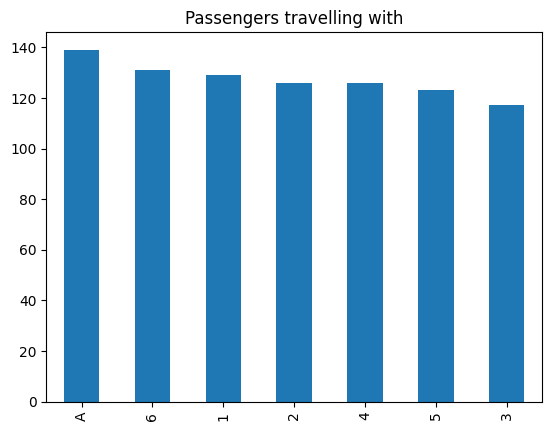

In [328]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [329]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [330]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

Cabin            Ticket number  Survived  number_numerical  \
0   NaN         A/5 21171      5         0               5.0   
1   C85          PC 17599      3         1               3.0   
2   NaN  STON/O2. 3101282      6         1               6.0   
3  C123            113803      3         1               3.0   
4   NaN            373450      A         0               NaN   

  number_categorical  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                  A

In [331]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [332]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [333]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

Cabin            Ticket number  Survived  number_numerical  \
0   NaN         A/5 21171      5         0               5.0   
1   C85          PC 17599      3         1               3.0   
2   NaN  STON/O2. 3101282      6         1               6.0   
3  C123            113803      3         1               3.0   
4   NaN            373450      A         0               NaN   

  number_categorical cabin_num cabin_cat  
0                NaN       NaN       NaN  
1                NaN        85         C  
2                NaN       NaN       NaN  
3                NaN       123         C  
4                  A       NaN       NaN

<Axes: >

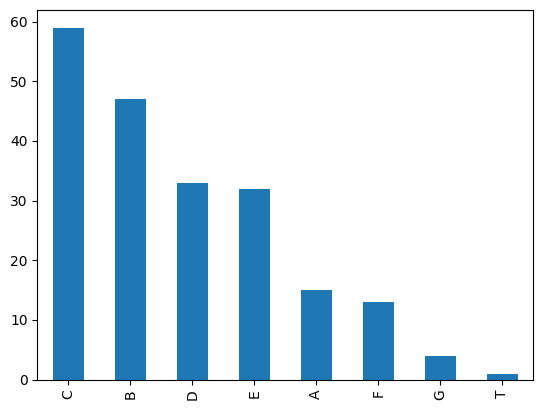

In [334]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [335]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

Cabin            Ticket number  Survived  number_numerical  \
0    NaN         A/5 21171      5         0               5.0   
1    C85          PC 17599      3         1               3.0   
2    NaN  STON/O2. 3101282      6         1               6.0   
3   C123            113803      3         1               3.0   
4    NaN            373450      A         0               NaN   
5    NaN            330877      2         0               2.0   
6    E46             17463      2         0               2.0   
7    NaN            349909      5         0               5.0   
8    NaN            347742      1         1               1.0   
9    NaN            237736      A         1               NaN   
10    G6           PP 9549      1         1               1.0   
11  C103            113783      1         1               1.0   
12   NaN         A/5. 2151      3         0               3.0   
13   NaN            347082      3         0               3.0   
14   NaN            350406      5         0               5.0   
15   NaN            248706      3         1               3.0   
16   NaN            382652      3         0               3.0   
17   NaN            244373      2         1               2.0   
18   NaN            345763      5         0               5.0   
19   NaN              2649      4         1               4.0   

   number_categorical cabin_num cabin_cat  ticket_num ticket_cat  
0                 NaN       NaN       NaN     21171.0        A/5  
1                 NaN        85         C     17599.0         PC  
2                 NaN       NaN       NaN   3101282.0   STON/O2.  
3                 NaN       123         C    113803.0        NaN  
4                   A       NaN       NaN    373450.0        NaN  
5                 NaN       NaN       NaN    330877.0        NaN  
6                 NaN        46         E     17463.0        NaN  
7                 NaN       NaN       NaN    349909.0        NaN  
8                 NaN       NaN       NaN    347742.0        NaN  
9                   A       NaN       NaN    237736.0        NaN  
10                NaN         6         G      9549.0         PP  
11                NaN       103         C    113783.0        NaN  
12                NaN       NaN       NaN      2151.0       A/5.  
13                NaN       NaN       NaN    347082.0        NaN  
14                NaN       NaN       NaN    350406.0        NaN  
15                NaN       NaN       NaN    248706.0        NaN  
16                NaN       NaN       NaN    382652.0        NaN  
17                NaN       NaN       NaN    244373.0        NaN  
18                NaN       NaN       NaN    345763.0        NaN  
19                NaN       NaN       NaN      2649.0        NaN

In [336]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Handling Date and Time</p>

In [340]:
date = pd.read_csv('./Datasets/orders.csv')
time = pd.read_csv('./Datasets/messages.csv')

In [341]:
date.head()

date  product_id  city_id  orders
0  2019-12-10        5628       25       3
1  2018-08-15        3646       14     157
2  2018-10-23        1859       25       1
3  2019-08-17        7292       25       1
4  2019-01-06        4344       25       3

In [342]:
time.head()

date                                                msg
0  2013-12-15 00:50:00                           ищу на сегодня мужика 37
1  2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2  2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576
3  2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4  2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше

In [343]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [344]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### Working with Dates

In [345]:
# Converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])

In [346]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


#### 1. Extract year

In [350]:
date['date_year'] = date['date'].dt.year

date.sample(5)

date  product_id  city_id  orders  date_year
940 2019-03-02        7208        6       1       2019
725 2018-08-08        7556        7       5       2018
863 2019-03-14        3241       26       1       2019
114 2019-11-28        6534       14       2       2019
953 2018-11-24        1848       14     120       2018

#### 2. Extract Month

In [351]:
date['date_month_no'] = date['date'].dt.month

date.head()

date  product_id  city_id  orders  date_year  date_month_no
0 2019-12-10        5628       25       3       2019             12
1 2018-08-15        3646       14     157       2018              8
2 2018-10-23        1859       25       1       2018             10
3 2019-08-17        7292       25       1       2019              8
4 2019-01-06        4344       25       3       2019              1

In [352]:
date['date_month_name'] = date['date'].dt.month_name()

date.head()

date  product_id  city_id  orders  date_year  date_month_no  \
0 2019-12-10        5628       25       3       2019             12   
1 2018-08-15        3646       14     157       2018              8   
2 2018-10-23        1859       25       1       2018             10   
3 2019-08-17        7292       25       1       2019              8   
4 2019-01-06        4344       25       3       2019              1   

  date_month_name  
0        December  
1          August  
2         October  
3          August  
4         January

#### Extract Days

In [353]:
date['date_day'] = date['date'].dt.day

date.head()

date  product_id  city_id  orders  date_year  date_month_no  \
0 2019-12-10        5628       25       3       2019             12   
1 2018-08-15        3646       14     157       2018              8   
2 2018-10-23        1859       25       1       2018             10   
3 2019-08-17        7292       25       1       2019              8   
4 2019-01-06        4344       25       3       2019              1   

  date_month_name  date_day  
0        December        10  
1          August        15  
2         October        23  
3          August        17  
4         January         6

In [354]:
# day of week
date['date_dow'] = date['date'].dt.dayofweek

date.head()


date  product_id  city_id  orders  date_year  date_month_no  \
0 2019-12-10        5628       25       3       2019             12   
1 2018-08-15        3646       14     157       2018              8   
2 2018-10-23        1859       25       1       2018             10   
3 2019-08-17        7292       25       1       2019              8   
4 2019-01-06        4344       25       3       2019              1   

  date_month_name  date_day  date_dow  
0        December        10         1  
1          August        15         2  
2         October        23         1  
3          August        17         5  
4         January         6         6

In [355]:
# day of week - name

date['date_dow_name'] = date['date'].dt.day_name()

date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month_no date_month_name  date_day  date_dow  \
0 2019-12-10       2019             12        December        10         1   
1 2018-08-15       2018              8          August        15         2   
2 2018-10-23       2018             10         October        23         1   
3 2019-08-17       2019              8          August        17         5   
4 2019-01-06       2019              1         January         6         6   

  date_dow_name  
0       Tuesday  
1     Wednesday  
2       Tuesday  
3      Saturday  
4        Sunday

In [356]:
# is weekend?

date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month_no date_month_name  date_day  date_dow  \
0 2019-12-10       2019             12        December        10         1   
1 2018-08-15       2018              8          August        15         2   
2 2018-10-23       2018             10         October        23         1   
3 2019-08-17       2019              8          August        17         5   
4 2019-01-06       2019              1         January         6         6   

  date_dow_name  date_is_weekend  
0       Tuesday                0  
1     Wednesday                0  
2       Tuesday                0  
3      Saturday                1  
4        Sunday                1

#### Extract week of the year

In [358]:
date['date_week'] = date['date'].dt.isocalendar().week

date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month_no date_month_name  date_day  date_dow  \
0 2019-12-10       2019             12        December        10         1   
1 2018-08-15       2018              8          August        15         2   
2 2018-10-23       2018             10         October        23         1   
3 2019-08-17       2019              8          August        17         5   
4 2019-01-06       2019              1         January         6         6   

  date_dow_name  date_is_weekend  date_week  
0       Tuesday                0         50  
1     Wednesday                0         33  
2       Tuesday                0         43  
3      Saturday                1         33  
4        Sunday                1          1

#### Extract Quarter

In [359]:
date['quarter'] = date['date'].dt.quarter

date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month_no date_month_name  date_day  date_dow  \
0 2019-12-10       2019             12        December        10         1   
1 2018-08-15       2018              8          August        15         2   
2 2018-10-23       2018             10         October        23         1   
3 2019-08-17       2019              8          August        17         5   
4 2019-01-06       2019              1         January         6         6   

  date_dow_name  date_is_weekend  date_week  quarter  
0       Tuesday                0         50        4  
1     Wednesday                0         33        3  
2       Tuesday                0         43        4  
3      Saturday                1         33        3  
4        Sunday                1          1        1

#### Extract Semester

In [360]:
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)

date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month_no date_month_name  date_day  date_dow  \
0 2019-12-10       2019             12        December        10         1   
1 2018-08-15       2018              8          August        15         2   
2 2018-10-23       2018             10         October        23         1   
3 2019-08-17       2019              8          August        17         5   
4 2019-01-06       2019              1         January         6         6   

  date_dow_name  date_is_weekend  date_week  quarter  semester  
0       Tuesday                0         50        4         2  
1     Wednesday                0         33        3         2  
2       Tuesday                0         43        4         2  
3      Saturday                1         33        3         2  
4        Sunday                1          1        1         1

#### Extract Time elapsed between dates

In [361]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2024, 10, 22, 20, 10, 25, 259711)

In [362]:
today - date['date']

0     1778 days 20:10:25.259711
1     2260 days 20:10:25.259711
2     2191 days 20:10:25.259711
3     1893 days 20:10:25.259711
4     2116 days 20:10:25.259711
                 ...           
995   2206 days 20:10:25.259711
996   2147 days 20:10:25.259711
997   1995 days 20:10:25.259711
998   2060 days 20:10:25.259711
999   1834 days 20:10:25.259711
Name: date, Length: 1000, dtype: timedelta64[ns]

In [363]:
(today - date['date']).dt.days

0      1778
1      2260
2      2191
3      1893
4      2116
       ... 
995    2206
996    2147
997    1995
998    2060
999    1834
Name: date, Length: 1000, dtype: int64

In [364]:
# Months passed

np.round((today -date['date']) / np.timedelta64(1, 'M'),0)

0      58.0
1      74.0
2      72.0
3      62.0
4      70.0
       ... 
995    73.0
996    71.0
997    66.0
998    68.0
999    60.0
Name: date, Length: 1000, dtype: float64

In [365]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [366]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [367]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [368]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

date                                                msg  \
0 2013-12-15 00:50:00                           ищу на сегодня мужика 37   
1 2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826   
2 2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576   
3 2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...   
4 2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше   

   hour  min  sec  
0     0   50    0  
1    23   40    0  
2     0   21    0  
3     0   31    0  
4    23   11    0

#### Extract Time part

In [369]:
time['time'] = time['date'].dt.time

time.head()

date                                                msg  \
0 2013-12-15 00:50:00                           ищу на сегодня мужика 37   
1 2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826   
2 2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576   
3 2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...   
4 2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше   

   hour  min  sec      time  
0     0   50    0  00:50:00  
1    23   40    0  23:40:00  
2     0   21    0  00:21:00  
3     0   31    0  00:31:00  
4    23   11    0  23:11:00

#### Time difference

In [370]:
today - time['date']

0     3964 days 19:20:25.259711
1     3828 days 20:30:25.259711
2     4314 days 19:49:25.259711
3     3616 days 19:39:25.259711
4     4013 days 20:59:25.259711
                 ...           
995   4603 days 19:20:25.259711
996   3924 days 20:56:25.259711
997   4389 days 20:33:25.259711
998   4505 days 20:36:25.259711
999   3777 days 20:45:25.259711
Name: date, Length: 1000, dtype: timedelta64[ns]

In [371]:
# in seconds

(today - time['date'])/np.timedelta64(1,'s')

0      3.425592e+08
1      3.308130e+08
2      3.728010e+08
3      3.124932e+08
4      3.467988e+08
           ...     
995    3.977688e+08
996    3.391090e+08
997    3.792836e+08
998    3.893062e+08
999    3.264075e+08
Name: date, Length: 1000, dtype: float64

In [372]:
# in minutes

(today - time['date'])/np.timedelta64(1,'m')

0      5.709320e+06
1      5.513550e+06
2      6.213349e+06
3      5.208219e+06
4      5.779979e+06
           ...     
995    6.629480e+06
996    5.651816e+06
997    6.321393e+06
998    6.488436e+06
999    5.440125e+06
Name: date, Length: 1000, dtype: float64

In [373]:
# in hours

(today - time['date'])/np.timedelta64(1,'h')

0       95155.340350
1       91892.507017
2      103555.823683
3       86803.657017
4       96332.990350
           ...      
995    110491.340350
996     94196.940350
997    105356.557017
998    108140.607017
999     90668.757017
Name: date, Length: 1000, dtype: float64

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Handling Missing Data</p>

### Complete Case Analysis (Remove Missing Values)
When to apply
- Missing values are random
- Missing values are less than 5%
- While predicting data should not be missing

In [374]:
df = pd.read_csv('./Datasets/data_science_job.csv')

In [375]:
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type  training_hours  \
0             STEM        20.0          NaN             NaN            36.0   
1             STEM        15.0        50-99         Pvt Ltd            47.0   
2             STEM         5.0          NaN             NaN            83.0   
3  Business Degree         0.0          NaN         Pvt Ltd            52.0   
4             STEM        20.0        50-99  Funded Startup             8.0   

   target  
0     1.0  
1     0.0  
2     0.0  
3     1.0  
4     0.0

In [376]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [377]:
df.shape

(19158, 13)

In [378]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [379]:
df[cols].sample(5)

city_development_index enrolled_university education_level  experience  \
18165                   0.855       no_enrollment         Masters        10.0   
4065                    0.920       no_enrollment        Graduate        20.0   
14397                   0.925       no_enrollment        Graduate         9.0   
15062                   0.939       no_enrollment        Graduate        10.0   
19047                   0.920       no_enrollment        Graduate         5.0   

       training_hours  
18165           244.0  
4065             60.0  
14397            44.0  
15062            94.0  
19047            60.0

In [380]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [381]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [382]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

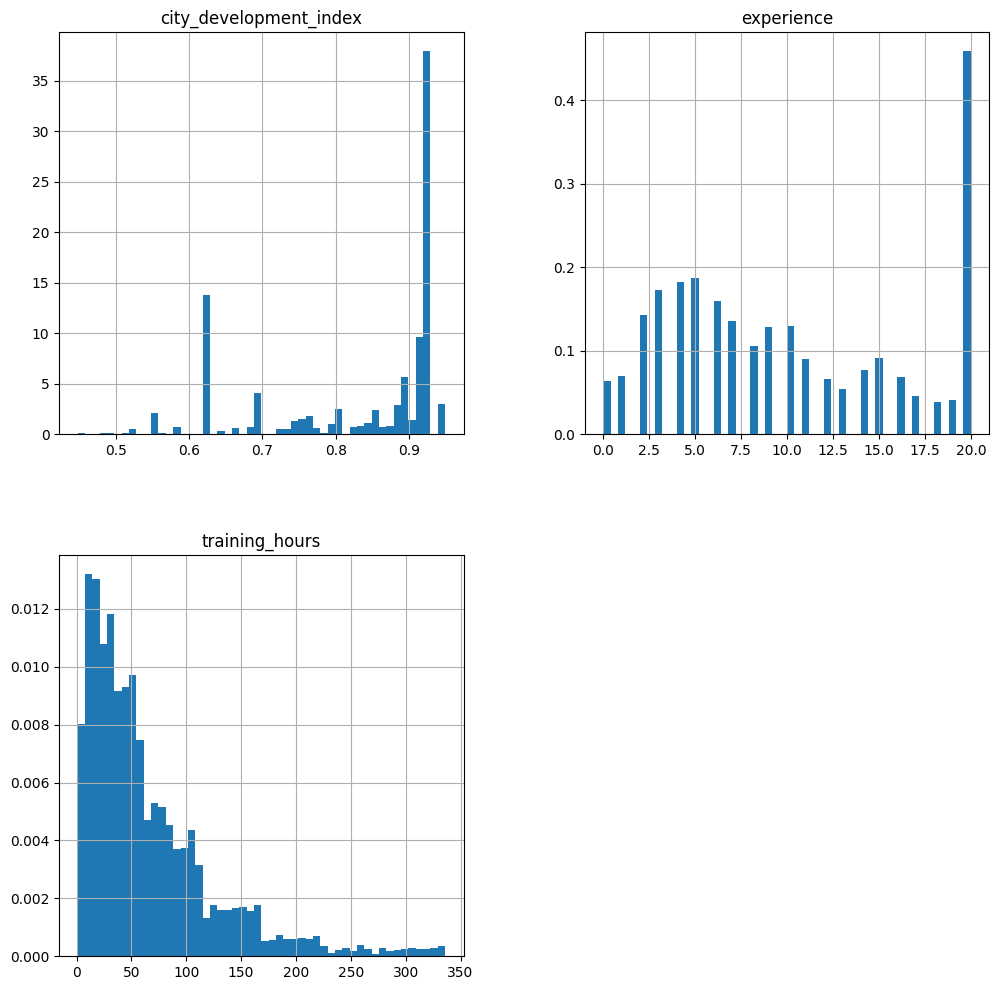

In [383]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

##### Check if distribution is similar after and before CCA

<Axes: >

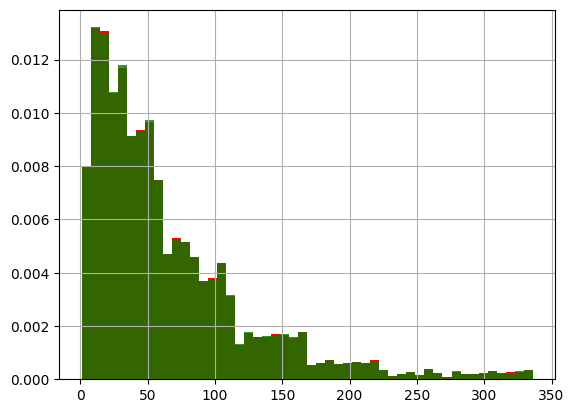

In [384]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

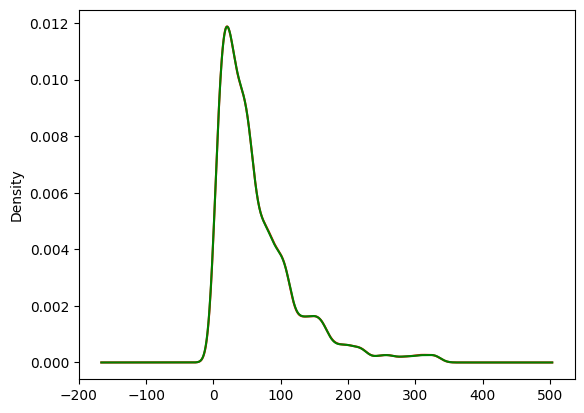

In [385]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

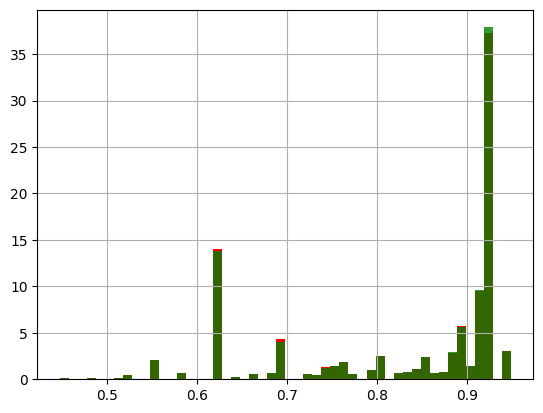

In [386]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

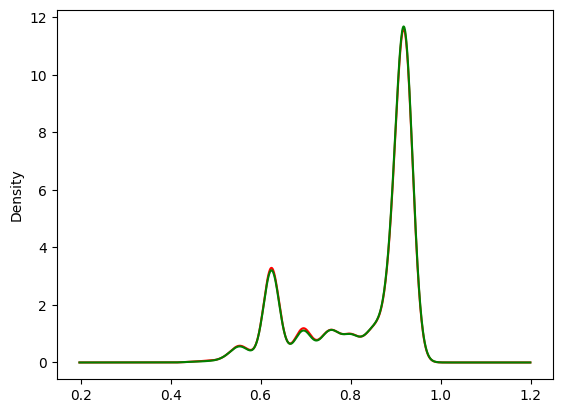

In [387]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

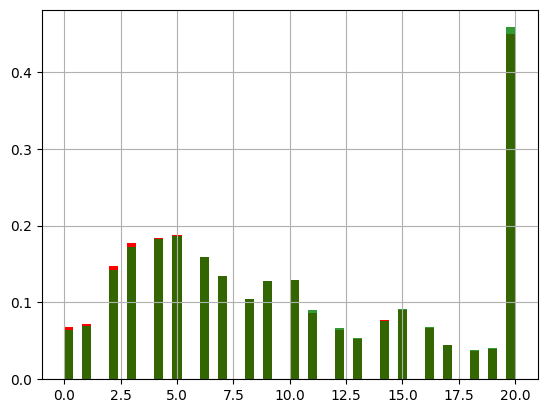

In [388]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

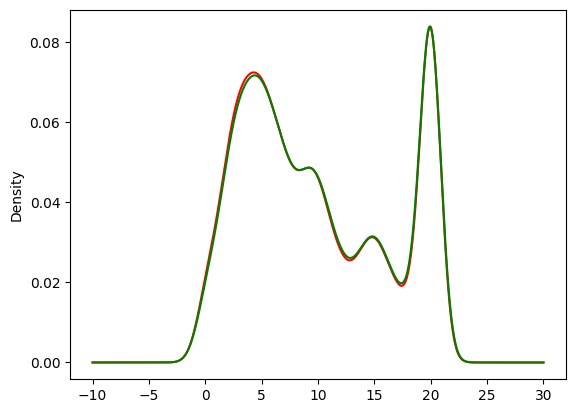

In [389]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

##### Check if ratio of catagories are similar after and before CCA

In [391]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

original       cca
no_enrollment     0.721213  0.735188
Full time course  0.196106  0.200733
Part time course  0.062533  0.064079

In [392]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

original       cca
Graduate        0.605387  0.619835
Masters         0.227633  0.234082
High School     0.105282  0.107380
Phd             0.021610  0.022116
Primary School  0.016077  0.016587

### Simple Imputer (Univariate Imputation) - Numerical Data

#### Mean-Median Imputaion
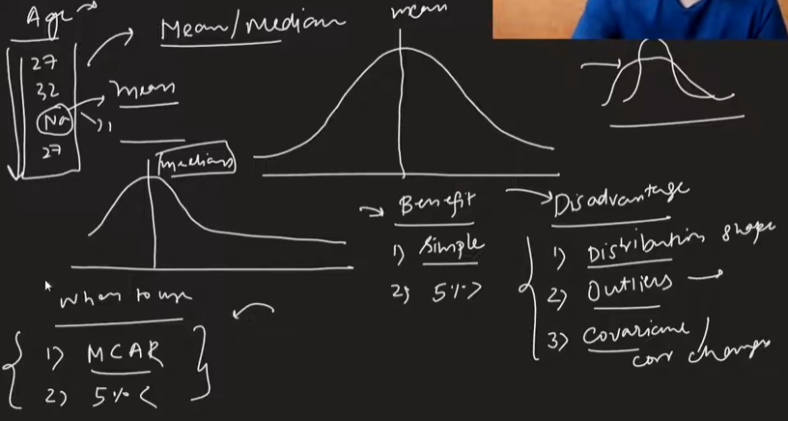

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [427]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [428]:
df = pd.read_csv('./Datasets/titanic_imputation.csv')

In [429]:
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [431]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [432]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [433]:
X.isnull().mean()

Age       0.198653
Fare      0.050505
Family    0.000000
dtype: float64

In [434]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=123)

In [435]:
X_train.shape, X_test.shape

((801, 3), (90, 3))

In [436]:
X_train.isnull().mean()

Age       0.200999
Fare      0.048689
Family    0.000000
dtype: float64

In [437]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [438]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [439]:
X_train.sample(5)

Age     Fare  Family  Age_median  Age_mean  Fare_median  Fare_mean
558  39.0  79.6500       2        39.0      39.0      79.6500    79.6500
309  30.0  56.9292       0        30.0      30.0      56.9292    56.9292
736  48.0  34.3750       4        48.0      48.0      34.3750    34.3750
275  63.0  77.9583       1        63.0      63.0      77.9583    77.9583
541   9.0  31.2750       6         9.0       9.0      31.2750    31.2750

In [440]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  206.96497210876367
Age Variance after median imputation:  165.74355071098623
Age Variance after mean imputation:  165.31327147187497
Original Fare variable variance:  2645.7687567819503
Fare Variance after median imputation:  2532.4112520878675
Fare Variance after mean imputation:  2516.7875298888302


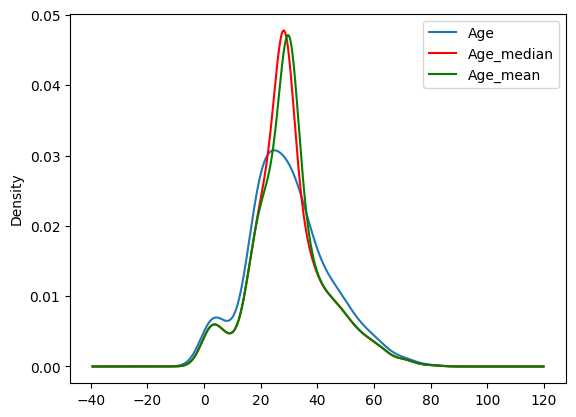

In [441]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

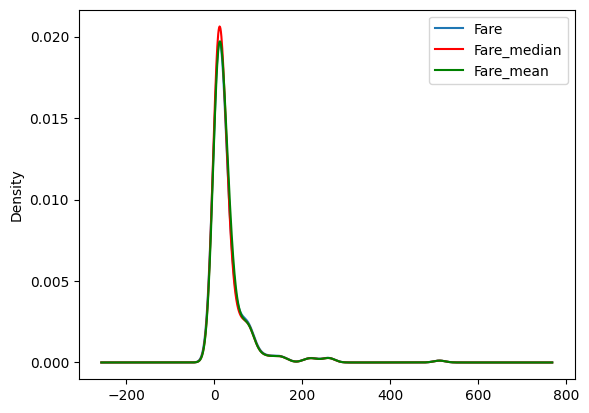

In [442]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [443]:
X_train.cov()

Age         Fare     Family  Age_median    Age_mean  \
Age          206.964972    84.089343  -5.693979  206.964972  206.964972   
Fare          84.089343  2645.768757  18.158915   70.512675   66.800309   
Family        -5.693979    18.158915   2.569666   -4.511454   -4.548066   
Age_median   206.964972    70.512675  -4.511454  165.743551  165.313271   
Age_mean     206.964972    66.800309  -4.548066  165.313271  165.313271   
Fare_median   78.311216  2645.768757  17.396977   66.013455   62.551083   
Fare_mean     79.554045  2645.768757  17.273668   67.075182   63.543794   

             Fare_median    Fare_mean  
Age            78.311216    79.554045  
Fare         2645.768757  2645.768757  
Family         17.396977    17.273668  
Age_median     66.013455    67.075182  
Age_mean       62.551083    63.543794  
Fare_median  2532.411252  2516.787530  
Fare_mean    2516.787530  2516.787530

In [444]:
X_train.corr()

Age      Fare    Family  Age_median  Age_mean  Fare_median  \
Age          1.000000  0.105582 -0.274886    1.000000  1.000000     0.101020   
Fare         0.105582  1.000000  0.217250    0.106196  0.100725     1.000000   
Family      -0.274886  0.217250  1.000000   -0.218605 -0.220666     0.215659   
Age_median   1.000000  0.106196 -0.218605    1.000000  0.998701     0.101894   
Age_mean     1.000000  0.100725 -0.220666    0.998701  1.000000     0.096675   
Fare_median  0.101020  1.000000  0.215659    0.101894  0.096675     1.000000   
Fare_mean    0.103007  1.000000  0.214794    0.103853  0.098514     0.996910   

             Fare_mean  
Age           0.103007  
Fare          1.000000  
Family        0.214794  
Age_median    0.103853  
Age_mean      0.098514  
Fare_median   0.996910  
Fare_mean     1.000000

<Axes: >

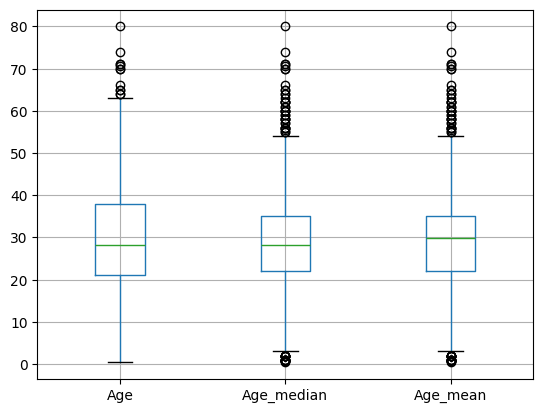

In [445]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

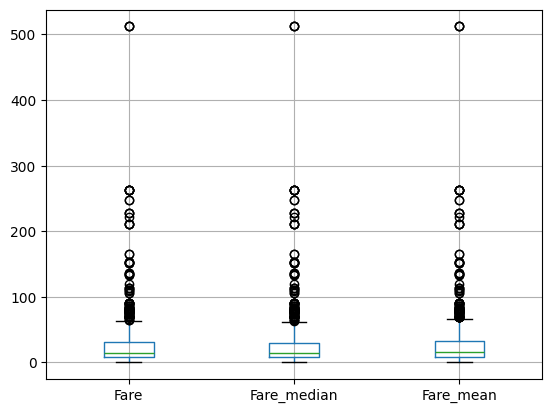

In [446]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

##### Using Sklearn

In [447]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [448]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [449]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [450]:
trf.fit(X_train)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [451]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [452]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [453]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [454]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

#### Arbitrary Imputaion
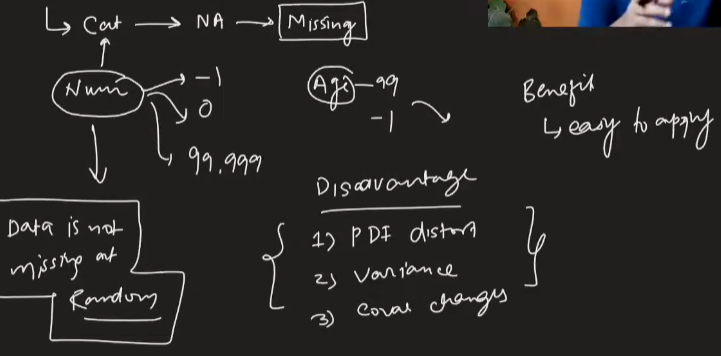
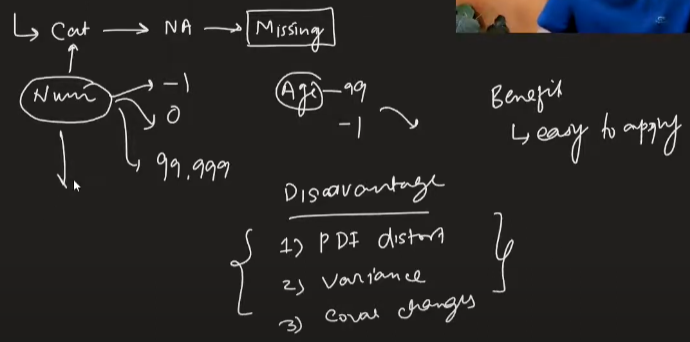

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [456]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [459]:
df = pd.read_csv('./Datasets/titanic_imputation.csv')

In [460]:
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [461]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [462]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [463]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [464]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [465]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


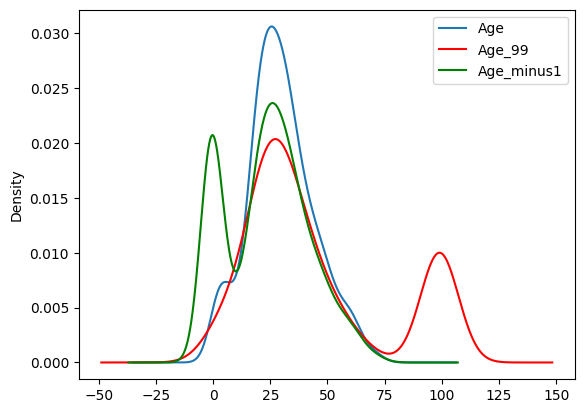

In [466]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

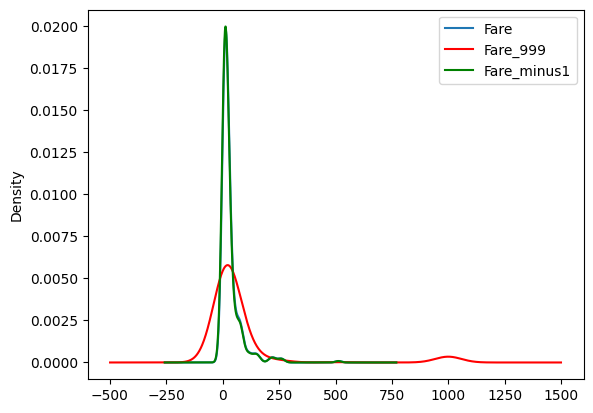

In [467]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [468]:
X_train.cov()

Age         Fare     Family      Age_99  Age_minus1  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917 -101.671097  125.558364   
Family        -6.498901    17.258917   2.735252   -7.387287   -4.149246   
Age_99       204.349513  -101.671097  -7.387287  951.727557 -189.535540   
Age_minus1   204.349513   125.558364  -4.149246 -189.535540  318.089620   
Fare_999     162.793430  2448.197914  11.528625 -159.931663  257.379887   
Fare_minus1   63.321188  2448.197914  16.553989  -94.317400  114.394141   

                 Fare_999  Fare_minus1  
Age            162.793430    63.321188  
Fare          2448.197914  2448.197914  
Family          11.528625    16.553989  
Age_99        -159.931663   -94.317400  
Age_minus1     257.379887   114.394141  
Fare_999     47219.202652   762.474982  
Fare_minus1    762.474982  2378.567678

In [469]:
X_train.corr()

Age      Fare    Family    Age_99  Age_minus1  Fare_999  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000  0.051179   
Fare         0.092644  1.000000  0.208268 -0.066273    0.142022  1.000000   
Family      -0.299113  0.208268  1.000000 -0.144787   -0.140668  0.032079   
Age_99       1.000000 -0.066273 -0.144787  1.000000   -0.344476 -0.023857   
Age_minus1   1.000000  0.142022 -0.140668 -0.344476    1.000000  0.066411   
Fare_999     0.051179  1.000000  0.032079 -0.023857    0.066411  1.000000   
Fare_minus1  0.084585  1.000000  0.205233 -0.062687    0.131514  0.071946   

             Fare_minus1  
Age             0.084585  
Fare            1.000000  
Family          0.205233  
Age_99         -0.062687  
Age_minus1      0.131514  
Fare_999        0.071946  
Fare_minus1     1.000000

##### Using Sklearn

In [471]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [472]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [473]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [474]:
trf.fit(X_train)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [475]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [476]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [477]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [478]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

### Simple Imputer (Univariate Imputation) - Catagorical Data

#### Mode (Frequent-Value) Imputaion

In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [491]:
df = pd.read_csv('./Datasets/housing.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [492]:
df.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [493]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: >

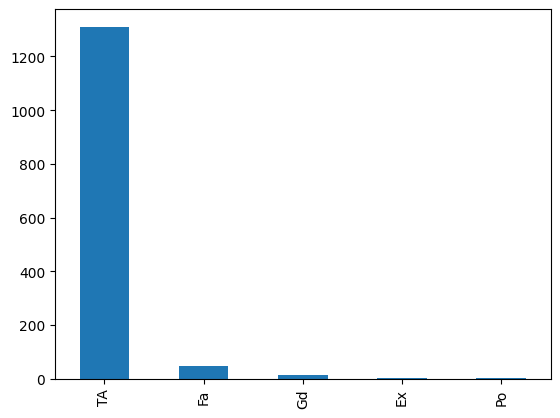

In [494]:
df['GarageQual'].value_counts().plot(kind='bar')

In [495]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

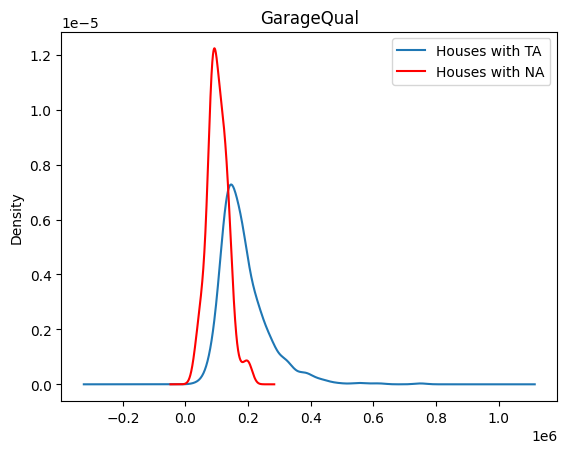

In [496]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [497]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [498]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: >

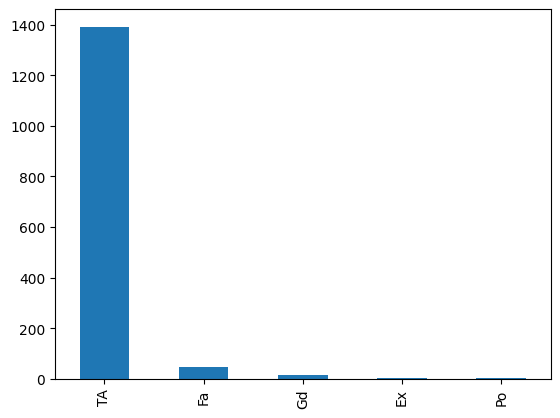

In [499]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

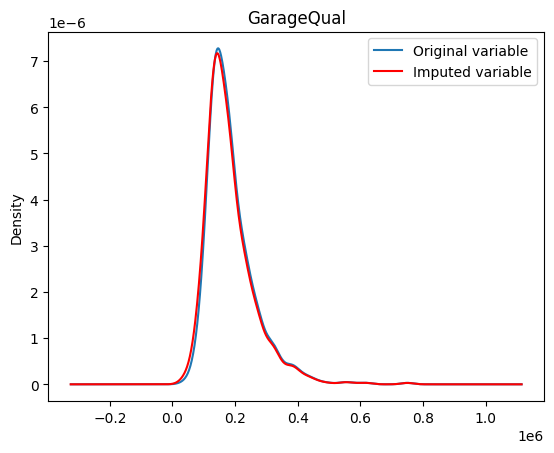

In [500]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: >

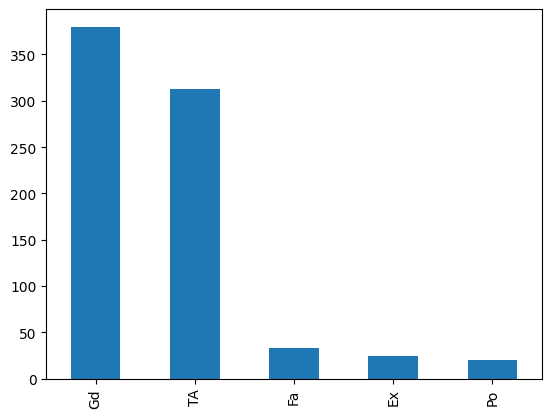

In [501]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [502]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

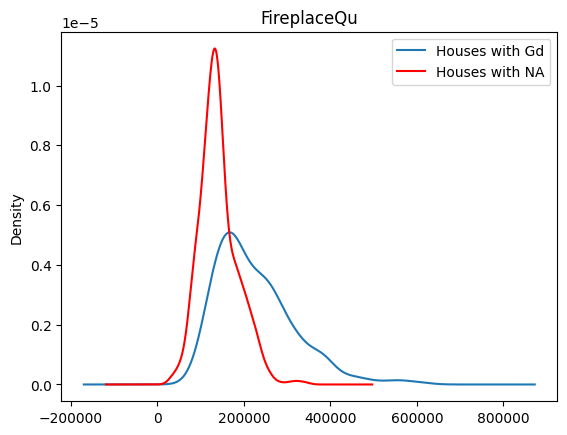

In [503]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [504]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [505]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: >

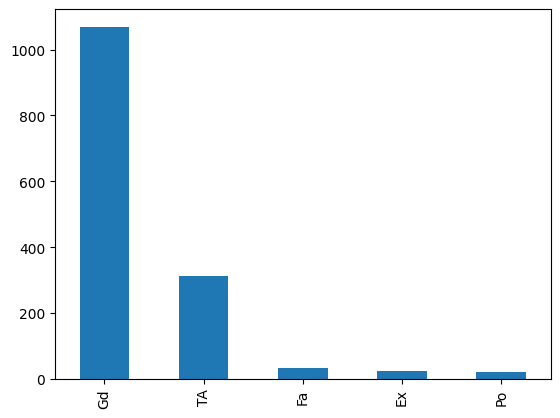

In [506]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

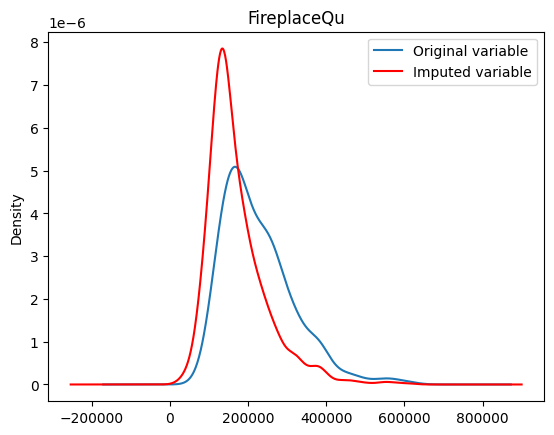

In [507]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [508]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [509]:
from sklearn.impute import SimpleImputer

In [510]:
imputer = SimpleImputer(strategy='most_frequent')

In [511]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [512]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

#### Arbitrary Imputaion

In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [514]:
df = pd.read_csv('./Datasets/housing.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [515]:
df.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [516]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

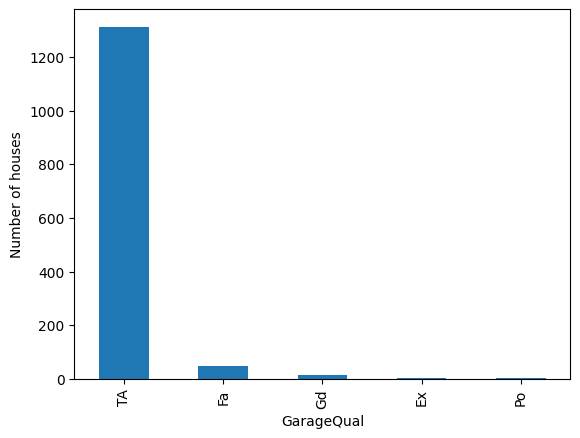

In [517]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [518]:
df['GarageQual'].fillna('Missing', inplace=True)


Text(0, 0.5, 'Number of houses')

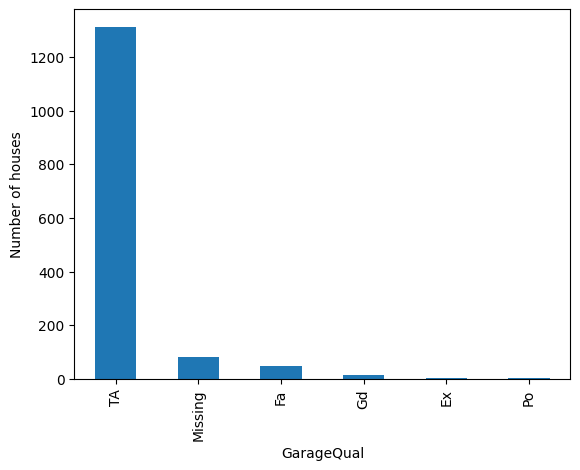

In [519]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [520]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [521]:
from sklearn.impute import SimpleImputer

In [522]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [523]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [524]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

### Random (Univariate Imputation) - Catagorical or Numarical Data

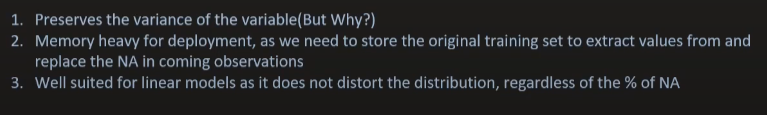

Numarical

In [525]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
df = pd.read_csv('./Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [527]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [528]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [529]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [530]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [531]:
X_train

Age      Fare
30   40.0   27.7208
10    4.0   16.7000
873  47.0    9.0000
182   9.0   31.3875
876  20.0    9.8458
..    ...       ...
534  30.0    8.6625
584   NaN    8.7125
493  71.0   49.5042
527   NaN  221.7792
168   NaN   25.9250

[712 rows x 2 columns]

In [532]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [533]:
X_test.tail()

Age     Fare  Age_imputed
89   24.0   8.0500         24.0
80   22.0   9.0000         22.0
846   NaN  69.5500          NaN
870  26.0   7.8958         26.0
251  29.0  10.4625         29.0

In [536]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

2      26.0
263    40.0
115    21.0
526    50.0
225    22.0
       ... 
332    38.0
705    39.0
234    24.0
798    30.0
852     9.0
Name: Age, Length: 148, dtype: float64

In [535]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [537]:
X_train['Age'].isnull().sum()

148

In [538]:
X_train

Age      Fare  Age_imputed
30   40.0   27.7208         40.0
10    4.0   16.7000          4.0
873  47.0    9.0000         47.0
182   9.0   31.3875          9.0
876  20.0    9.8458         20.0
..    ...       ...          ...
534  30.0    8.6625         30.0
584   NaN    8.7125         21.0
493  71.0   49.5042         71.0
527   NaN  221.7792         52.0
168   NaN   25.9250         24.0

[712 rows x 3 columns]

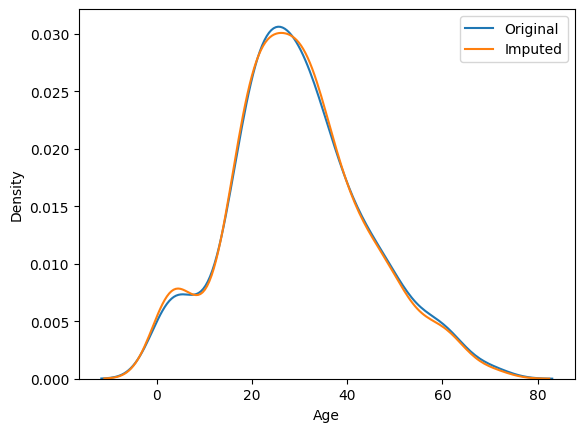

In [544]:
# Plot both distributions on the same figure
sns.kdeplot(x=X_train['Age'], label='Original', fill=False)
sns.kdeplot(x=X_train['Age_imputed'], label='Imputed', fill=False)

# Add a legend
plt.legend()
# Display the plot
plt.show()

In [545]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  201.63339546057932


In [546]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

Fare         Age  Age_imputed
Fare         2368.246832   71.512440    72.353367
Age            71.512440  204.349513   204.349513
Age_imputed    72.353367  204.349513   201.633395

<Axes: >

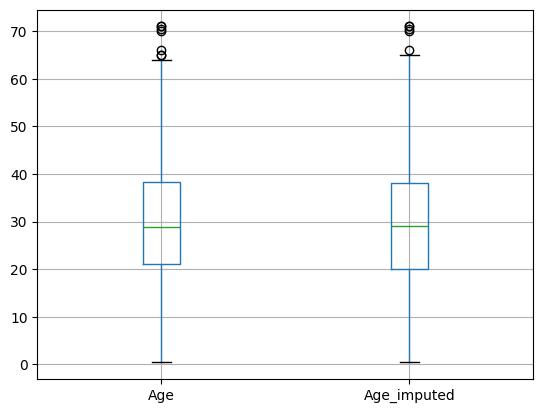

In [547]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

Catagorical

In [567]:
data = pd.read_csv('./Datasets/housing.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [568]:
data.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [569]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [570]:
X = data
y = data['SalePrice']

In [571]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [572]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [573]:
X_train.sample(5)

FireplaceQu GarageQual  SalePrice GarageQual_imputed FireplaceQu_imputed
1232         NaN         TA     101800                 TA                 NaN
669           Gd         TA     137500                 TA                  Gd
238          NaN         TA     318000                 TA                 NaN
1009         NaN        NaN     102000                NaN                 NaN
1155          Fa         TA     218000                 TA                  Fa

In [574]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\saura\AppData\Local\Temp\ipykernel_6340\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\saura\AppData\Local\Temp\ipykernel_6340\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\saura\AppData\Local\Temp\ipykernel_6340\856878696.py:4: SettingWithCopyWarning: 
A value

In [575]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [576]:
temp

original   imputed
TA  0.951043  0.952055
Fa  0.037171  0.036815
Gd  0.009973  0.009418
Po  0.000907  0.000856
Ex  0.000907  0.000856

In [577]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

original   imputed
Gd  0.494272  0.655443
TA  0.412439  0.530864
Fa  0.040917  0.054994
Po  0.027823  0.037037
Ex  0.024550  0.032548

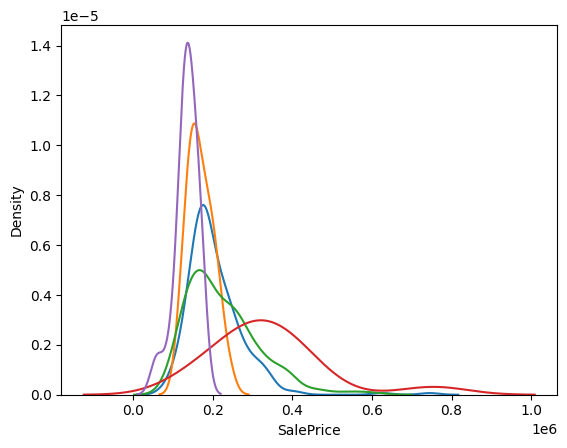

In [579]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(x=X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

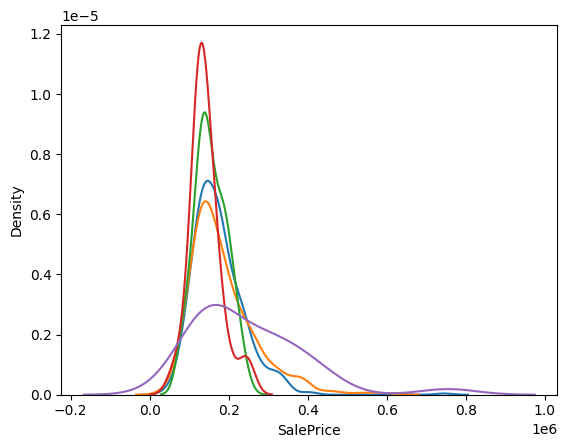

In [581]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()

### Missing Indicator (Univariate Imputation) - Catagorical or Numarical Data

In [582]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [583]:
df = pd.read_csv('./Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [584]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [585]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [586]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [587]:
X_train.head()

Age     Fare
30   40.0  27.7208
10    4.0  16.7000
873  47.0   9.0000
182   9.0  31.3875
876  20.0   9.8458

In [588]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [589]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [590]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [591]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [592]:
mi.features_

array([0], dtype=int64)

In [593]:
X_train_missing = mi.transform(X_train)

In [ ]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [594]:
X_test_missing = mi.transform(X_test)

In [595]:
# X_test_missing

In [596]:
X_train['Age_NA'] = X_train_missing

In [601]:
X_train

Age      Fare  Age_NA
30   40.0   27.7208   False
10    4.0   16.7000   False
873  47.0    9.0000   False
182   9.0   31.3875   False
876  20.0    9.8458   False
..    ...       ...     ...
534  30.0    8.6625   False
584   NaN    8.7125    True
493  71.0   49.5042   False
527   NaN  221.7792    True
168   NaN   25.9250    True

[712 rows x 3 columns]

In [598]:
X_test['Age_NA'] = X_test_missing

In [600]:
X_test

Age     Fare  Age_NA
707  42.0  26.2875   False
37   21.0   8.0500   False
615  24.0  65.0000   False
169  28.0  56.4958   False
68   17.0   7.9250   False
..    ...      ...     ...
89   24.0   8.0500   False
80   22.0   9.0000   False
846   NaN  69.5500    True
870  26.0   7.8958   False
251  29.0  10.4625   False

[179 rows x 3 columns]

In [602]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [603]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [604]:
si = SimpleImputer(add_indicator=True)

In [605]:
X_train = si.fit_transform(X_train)

In [606]:
X_test = si.transform(X_test)

In [607]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

### Automatic Select Imputer (Univariate Imputation) - Catagorical or Numarical Data

In [608]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [611]:
df = pd.read_csv('./Datasets/titanic_train.csv')

In [612]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [613]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [614]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [615]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [616]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [617]:
X_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
30        1    male  40.0      0      0  27.7208        C
10        3  female   4.0      1      1  16.7000        S
873       3    male  47.0      0      0   9.0000        S
182       3    male   9.0      4      2  31.3875        S
876       3    male  20.0      0      0   9.8458        S

In [618]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [619]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [620]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [621]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [622]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [623]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [624]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [625]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

param_classifier__C param_preprocessor__cat__imputer__strategy  \
4                   1.0                              most_frequent   
5                   1.0                              most_frequent   
6                   1.0                                   constant   
7                   1.0                                   constant   
8                  10.0                              most_frequent   
9                  10.0                              most_frequent   
10                 10.0                                   constant   
11                 10.0                                   constant   
12                100.0                              most_frequent   
13                100.0                              most_frequent   
14                100.0                                   constant   
15                100.0                                   constant   
0                   0.1                              most_frequent   
1                   0.1                              most_frequent   
2                   0.1                                   constant   
3                   0.1                                   constant   

   param_preprocessor__num__imputer__strategy  mean_test_score  
4                                        mean         0.787852  
5                                      median         0.787852  
6                                        mean         0.787852  
7                                      median         0.787852  
8                                        mean         0.787852  
9                                      median         0.787852  
10                                       mean         0.787852  
11                                     median         0.787852  
12                                       mean         0.787852  
13                                     median         0.787852  
14                                       mean         0.787852  
15                                     median         0.787852  
0                                        mean         0.786444  
1                                      median         0.786444  
2                                        mean         0.786444  
3                                      median         0.786444

### KNN Imputer (Multivariate   Imputation) - Numarical Data

In [626]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [628]:
df = pd.read_csv('Datasets/titanic_train.csv')[['Age','Pclass','Fare','Survived']]

In [629]:
df.head()

Age  Pclass     Fare  Survived
0  22.0       3   7.2500         0
1  38.0       1  71.2833         1
2  26.0       3   7.9250         1
3  35.0       1  53.1000         1
4  35.0       3   8.0500         0

In [630]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [631]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [632]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [633]:
X_train.head()

Age  Pclass     Fare
30   40.0       1  27.7208
10    4.0       3  16.7000
873  47.0       3   9.0000
182   9.0       3  31.3875
876  20.0       3   9.8458

In [634]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [635]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [636]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [637]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

### Iterative Imputer or MICE Algorithm (Multivariate Imputation) - Catagorical or Numarical Data

In [638]:
import numpy as np
import pandas as p 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [660]:
df = np.round(pd.read_csv('./Datasets/50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(25)
df

R&D Spend  Administration  Marketing Spend  Profit
21        8.0            15.0             30.0    11.0
37        4.0             5.0             20.0     9.0
2        15.0            10.0             41.0    19.0
14       12.0            16.0             26.0    13.0
44        2.0            15.0              3.0     7.0
7        13.0            15.0             32.0    16.0
15       11.0            12.0             26.0    13.0
20        8.0            11.0             30.0    12.0
32        6.0            13.0              5.0    10.0
25        6.0            14.0             14.0    11.0
30        6.0            12.0              9.0    10.0
45        0.0            12.0              0.0     6.0
38        2.0             7.0             19.0     8.0
26        8.0            14.0             13.0    11.0
3        14.0            12.0             38.0    18.0
31        6.0            15.0              9.0    10.0
4        14.0             9.0             37.0    17.0
41        3.0             8.0             16.0     8.0
35        5.0             9.0             21.0    10.0
36        3.0            13.0             20.0     9.0
34        5.0            16.0             21.0    10.0
43        2.0            13.0              4.0     7.0
13        9.0            14.0             25.0    13.0
8        12.0            15.0             31.0    15.0
17        9.0            15.0             28.0    13.0

In [661]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[7,2] = np.NaN
df.iloc[-1,2] = np.NaN
df.head(8)

R&D Spend  Administration  Marketing Spend  Profit
21        8.0            15.0             30.0    11.0
37        NaN             5.0             20.0     9.0
2        15.0            10.0             41.0    19.0
14       12.0             NaN             26.0    13.0
44        2.0            15.0              3.0     7.0
7        13.0            15.0             32.0    16.0
15       11.0            12.0             26.0    13.0
20        8.0            11.0              NaN    12.0

In [662]:
X = df.iloc[:,0:-1]
y = df["Profit"]

In [668]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

R&D Spend  Administration  Marketing Spend
30        6.0            12.0              9.0
35        5.0             9.0             21.0
36        3.0            13.0             20.0
44        2.0            15.0              3.0
2        15.0            10.0             41.0
34        5.0            16.0             21.0
15       11.0            12.0             26.0
20        8.0            11.0              NaN
13        9.0            14.0             25.0
37        NaN             5.0             20.0
4        14.0             9.0             37.0
21        8.0            15.0             30.0
31        6.0            15.0              9.0
17        9.0            15.0              NaN
8        12.0            15.0             31.0
25        6.0            14.0             14.0
32        6.0            13.0              5.0
38        2.0             7.0             19.0
45        0.0            12.0              0.0
7        13.0            15.0             32.0

In [669]:
X_test

R&D Spend  Administration  Marketing Spend
3        14.0            12.0             38.0
26        8.0            14.0             13.0
41        3.0             8.0             16.0
14       12.0             NaN             26.0
43        2.0            13.0              4.0

In [670]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, tol=1e-10, max_iter=20, verbose=2, imputation_order='roman')
imp.fit_transform(X_train)

[IterativeImputer] Completing matrix with shape (20, 3)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.09
[IterativeImputer] Change: 2.871623483699647, scaled tolerance: 4.1e-09 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.09
[IterativeImputer] Change: 0.08625546332581635, scaled tolerance: 4.1e-09 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.10
[IterativeImputer] Change: 0.001568158933364927, scaled tolerance: 4.1e-09 
[IterativeImputer] Ending imputation round 4/20, elapsed time 0.10
[IterativeImputer] Change: 2.849655045267241e-05, scaled tolerance: 4.1e-09 
[IterativeImputer] Ending imputation round 5/20, elapsed time 0.11
[IterativeImputer] Change: 5.1783419419138e-07, scaled tolerance: 4.1e-09 
[IterativeImputer] Ending imputation round 6/20, elapsed time 0.11
[IterativeImputer] Change: 9.409991008624274e-09, scaled tolerance: 4.1e-09 
[IterativeImputer] Ending imputation round 7/20, elapsed time 0.12
[IterativeImputer] Cha

array([[ 6.        , 12.        ,  9.        ],
       [ 5.        ,  9.        , 21.        ],
       [ 3.        , 13.        , 20.        ],
       [ 2.        , 15.        ,  3.        ],
       [15.        , 10.        , 41.        ],
       [ 5.        , 16.        , 21.        ],
       [11.        , 12.        , 26.        ],
       [ 8.        , 11.        , 23.06007163],
       [ 9.        , 14.        , 25.        ],
       [ 5.25922718,  5.        , 20.        ],
       [14.        ,  9.        , 37.        ],
       [ 8.        , 15.        , 30.        ],
       [ 6.        , 15.        ,  9.        ],
       [ 9.        , 15.        , 22.46842207],
       [12.        , 15.        , 31.        ],
       [ 6.        , 14.        , 14.        ],
       [ 6.        , 13.        ,  5.        ],
       [ 2.        ,  7.        , 19.        ],
       [ 0.        , 12.        ,  0.        ],
       [13.        , 15.        , 32.        ]])

In [671]:
X_train

R&D Spend  Administration  Marketing Spend
30        6.0            12.0              9.0
35        5.0             9.0             21.0
36        3.0            13.0             20.0
44        2.0            15.0              3.0
2        15.0            10.0             41.0
34        5.0            16.0             21.0
15       11.0            12.0             26.0
20        8.0            11.0              NaN
13        9.0            14.0             25.0
37        NaN             5.0             20.0
4        14.0             9.0             37.0
21        8.0            15.0             30.0
31        6.0            15.0              9.0
17        9.0            15.0              NaN
8        12.0            15.0             31.0
25        6.0            14.0             14.0
32        6.0            13.0              5.0
38        2.0             7.0             19.0
45        0.0            12.0              0.0
7        13.0            15.0             32.0

In [672]:
imp.fit_transform(X_test)

[IterativeImputer] Completing matrix with shape (5, 3)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.00
[IterativeImputer] Change: 2.2236957187213005, scaled tolerance: 3.8e-09 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.01
[IterativeImputer] Change: 0.0, scaled tolerance: 3.8e-09 
[IterativeImputer] Early stopping criterion reached.


array([[14.        , 12.        , 38.        ],
       [ 8.        , 14.        , 13.        ],
       [ 3.        ,  8.        , 16.        ],
       [12.        , 13.97369572, 26.        ],
       [ 2.        , 13.        ,  4.        ]])

In [673]:
X_test

R&D Spend  Administration  Marketing Spend
3        14.0            12.0             38.0
26        8.0            14.0             13.0
41        3.0             8.0             16.0
14       12.0             NaN             26.0
43        2.0            13.0              4.0

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Outlier Detection and Removal</p>

### Z-score Method

In [674]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [675]:
df = pd.read_csv('./Datasets/placement.csv')

In [676]:
df.shape

(1000, 3)

In [677]:
df.sample(5)

cgpa  placement_exam_marks  placed
56   6.93                  15.0       1
231  6.40                  35.0       0
993  6.73                  21.0       1
570  7.04                  18.0       0
789  6.46                  74.0       0

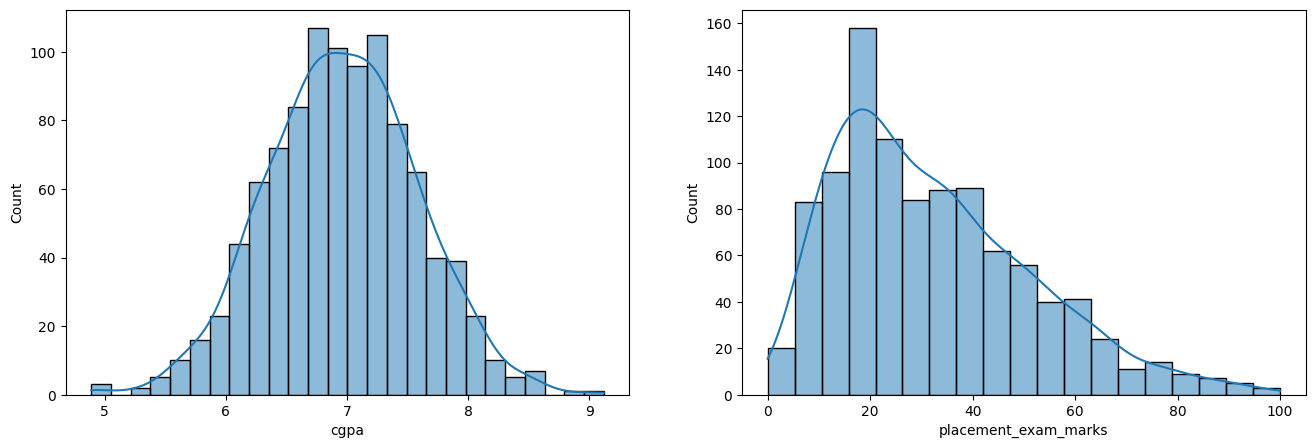

In [678]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(x=df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(x=df['placement_exam_marks'], kde=True)

plt.show()

In [682]:
df['cgpa'].skew(), df['placement_exam_marks'].skew()
# cgpa is not skewed nut placement_exam_marks is skewed so we cant apply z-score method in placement_exam_marks column

(-0.014529938929314918, 0.8356419499466834)

In [683]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


#### Approach 1 - Finding the Boundary Values

In [687]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [688]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

#### Remove Outlier Method 1 - Trimming

In [689]:
# Trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

#### Approach 2 - Calculating the Zscore

In [691]:
# Approach 2
# Calculating the Zscore
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [692]:
df.head()

cgpa  placement_exam_marks  placed  cgpa_zscore
0  7.19                  26.0       1     0.371425
1  7.46                  38.0       1     0.809810
2  7.54                  40.0       1     0.939701
3  6.42                   8.0       1    -0.878782
4  7.23                  17.0       0     0.436371

In [693]:
df[df['cgpa_zscore'] > 3]

cgpa  placement_exam_marks  placed  cgpa_zscore
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062

In [694]:
df[df['cgpa_zscore'] < -3]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

In [695]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

#### Remove Outlier Method 1 - Trimming

In [696]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [697]:
new_df

cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
991  7.04                  57.0       0     0.127878
992  6.26                  12.0       0    -1.138565
993  6.73                  21.0       1    -0.375452
994  6.48                  63.0       0    -0.781363
998  8.62                  46.0       1     2.693239

[995 rows x 4 columns]

#### Remove Outlier Method 1 - Capping

In [698]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [699]:
lower_limit

5.113546374602832

In [700]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [701]:
df.shape

(1000, 4)

In [702]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

### IQR Method

In [703]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [747]:
df = pd.read_csv('./Datasets/placement.csv')

In [748]:
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

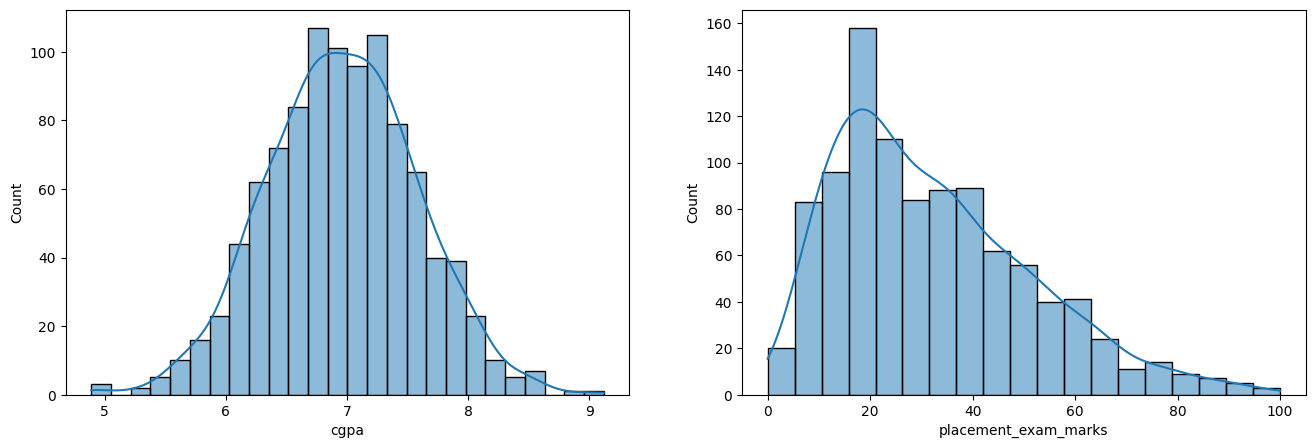

In [749]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(x=df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(x=df['placement_exam_marks'], kde=True)

plt.show()

In [750]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

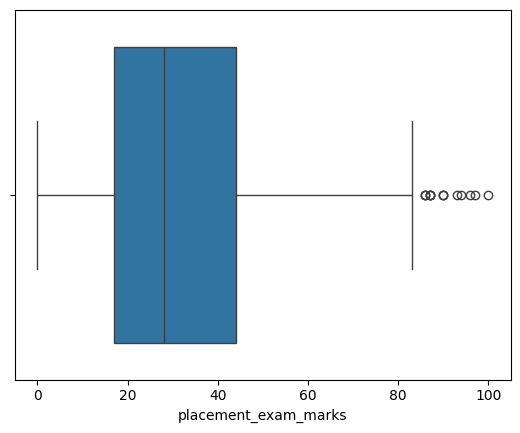

In [751]:
sns.boxplot(x=df['placement_exam_marks'])

In [752]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [753]:
percentile75

44.0

In [754]:
iqr = percentile75 - percentile25

In [755]:
iqr

27.0

In [756]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [757]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


#### Finding Outliers

In [758]:
df[df['placement_exam_marks'] > upper_limit]

cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0

In [759]:
df[df['placement_exam_marks'] < lower_limit]

Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed]
Index: []

#### Remove Outlier Method 1 - Trimming

In [762]:
new_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

In [763]:
new_df.shape

(985, 3)

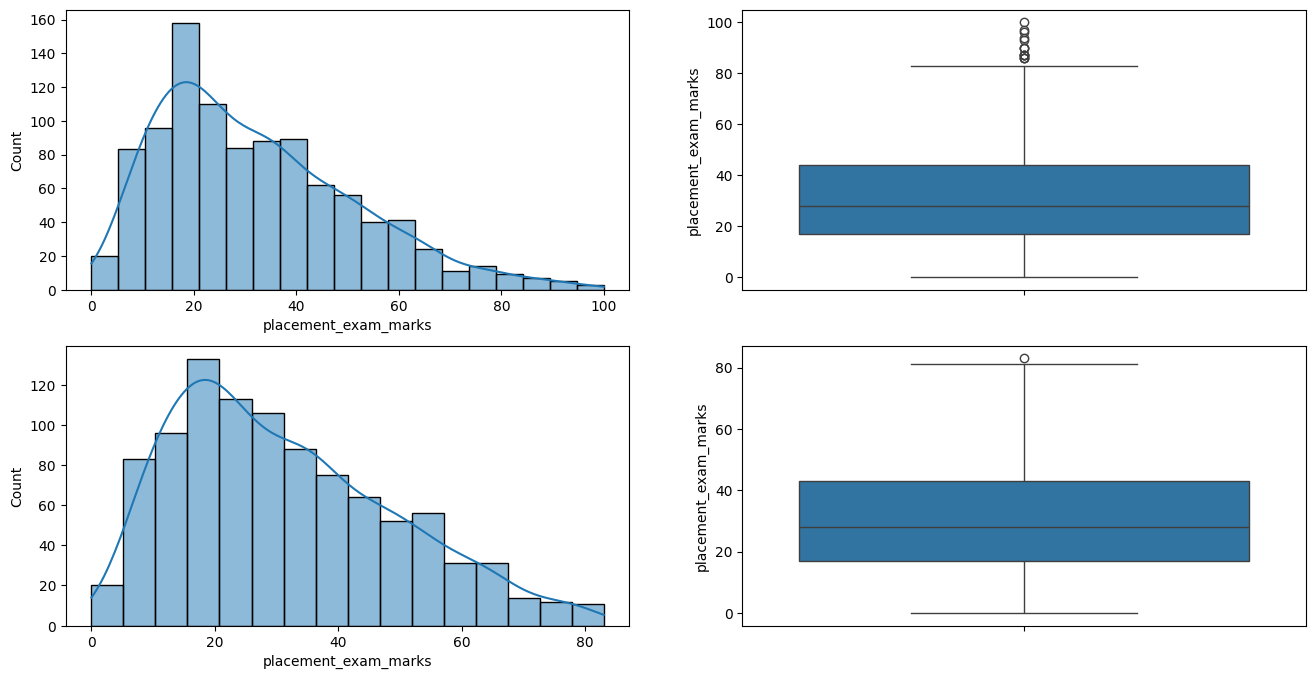

In [764]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(x=df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(x=new_df['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

#### Remove Outlier Method 1 - Capping

In [765]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [767]:
# np.where(condtion,true,false)

In [768]:
new_df_cap.shape

(1000, 3)

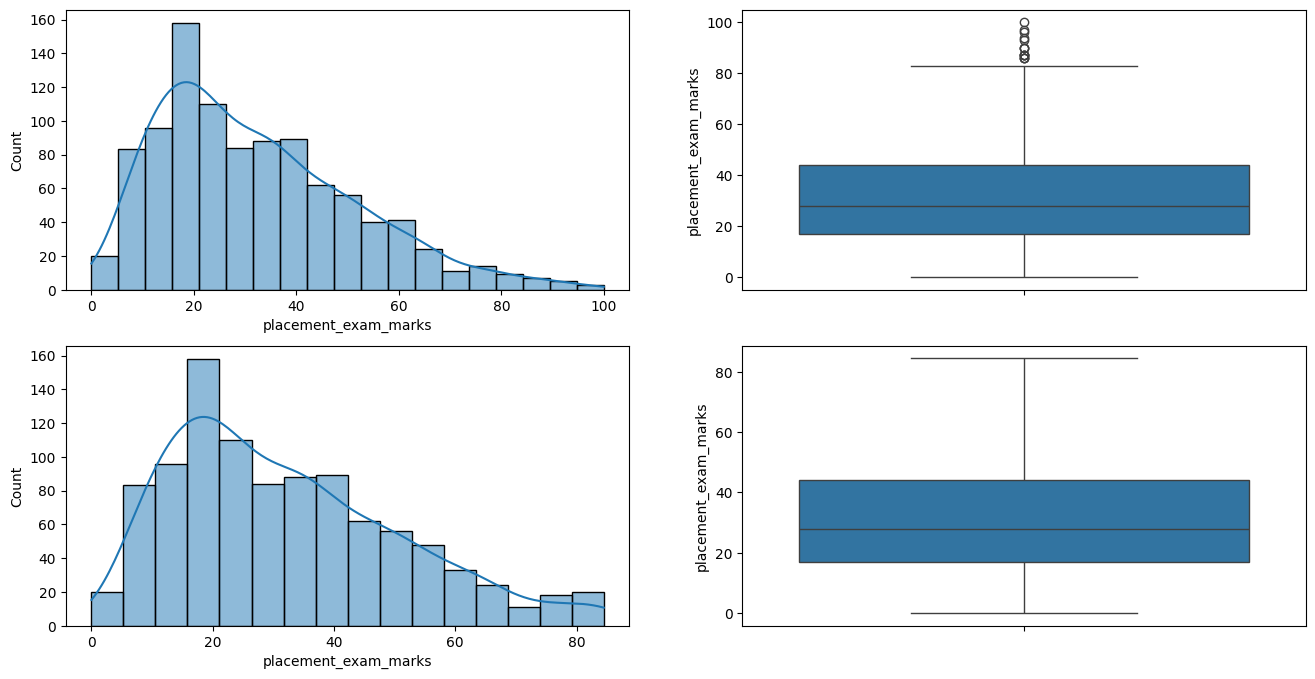

In [770]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(x=df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(x=new_df_cap['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

### Percentile Method

In [771]:
import numpy as np
import pandas as pd

In [772]:
df = pd.read_csv('./Datasets/weight-height.csv')

In [773]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [774]:
df.shape

(10000, 3)

In [775]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [776]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

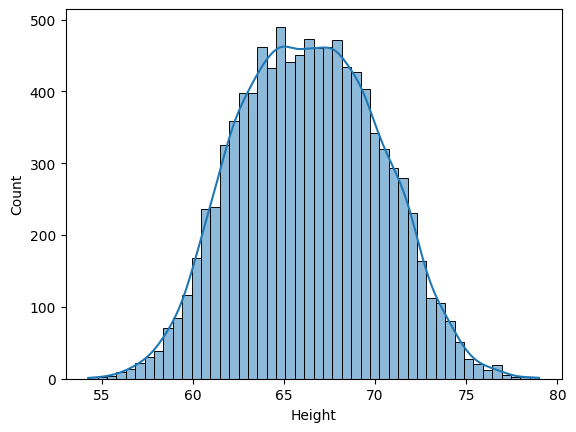

In [777]:
sns.histplot(df['Height'], kde=True)

<Axes: xlabel='Height'>

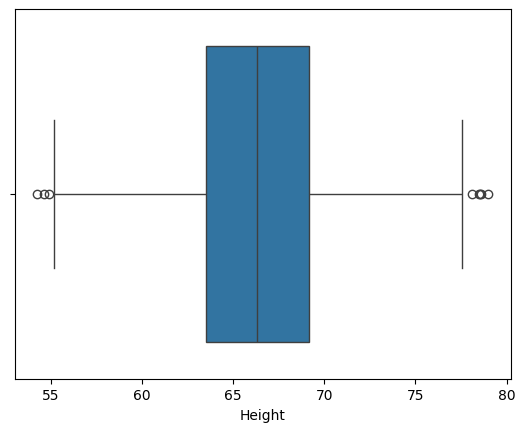

In [779]:
sns.boxplot(x=df['Height'])

In [799]:
# Make symmtric limits like - (0.01-0.99), (0.5-0.95)
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.78571507648495

In [781]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

#### Remove Outlier Method 1 - Trimming

In [782]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [783]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [784]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

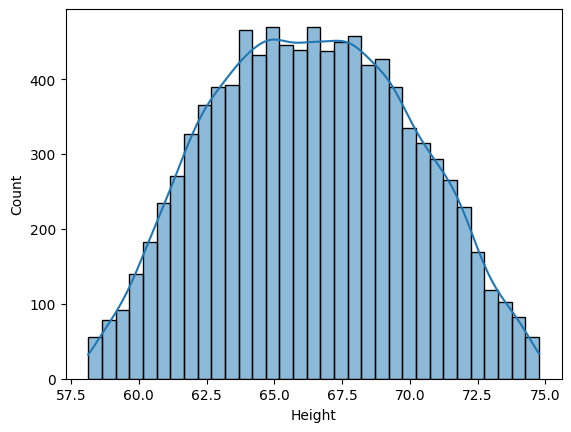

In [785]:
sns.histplot(new_df['Height'], kde=True)

<Axes: xlabel='Height'>

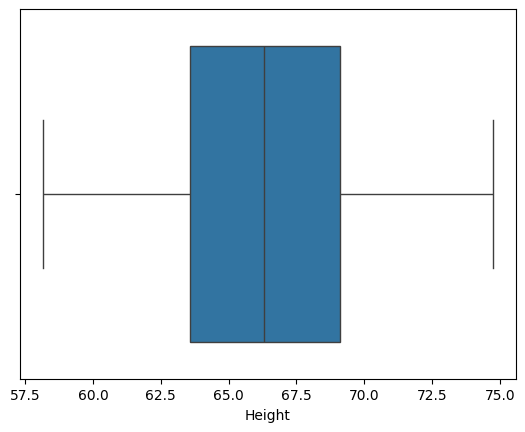

In [787]:
sns.boxplot(x=new_df['Height'])

#### Remove Outlier Method 1 - Capping (Winsorization)

In [788]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [789]:
df.shape

(10000, 3)

In [790]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

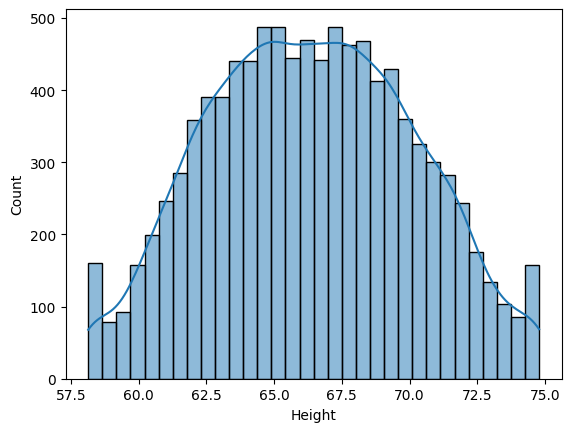

In [791]:
sns.histplot(df['Height'], kde=True)

<Axes: xlabel='Height'>

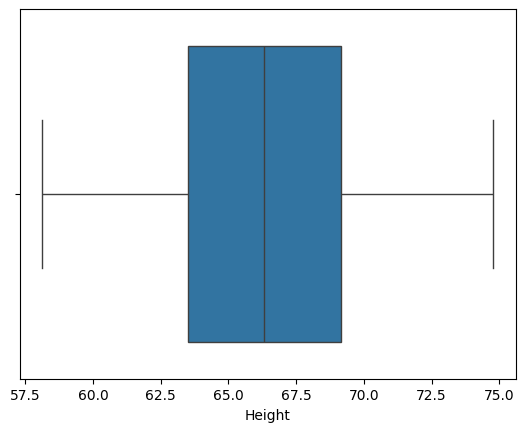

In [793]:
sns.boxplot(x=df['Height'])

# <p style="padding:10px;background-color:#D63B52;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Construction | Feature Splitting</p>

In [800]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [818]:
df = pd.read_csv('./Datasets/titanic_train.csv')[['Age','Pclass','SibSp','Parch','Survived']]

In [819]:
df.head()

Age  Pclass  SibSp  Parch  Survived
0  22.0       3      1      0         0
1  38.0       1      1      0         1
2  26.0       3      0      0         1
3  35.0       1      1      0         1
4  35.0       3      0      0         0

In [820]:
df.dropna(inplace=True)

In [821]:
df.head()

Age  Pclass  SibSp  Parch  Survived
0  22.0       3      1      0         0
1  38.0       1      1      0         1
2  26.0       3      0      0         1
3  35.0       1      1      0         1
4  35.0       3      0      0         0

In [822]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [823]:
X.head()

Age  Pclass  SibSp  Parch
0  22.0       3      1      0
1  38.0       1      1      0
2  26.0       3      0      0
3  35.0       1      1      0
4  35.0       3      0      0

In [824]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.6933333333333332

## Feature Construction

In [825]:
X['Family_size'] = X['SibSp'] + X['Parch'] + 1

In [826]:
X.head()

Age  Pclass  SibSp  Parch  Family_size
0  22.0       3      1      0            2
1  38.0       1      1      0            2
2  26.0       3      0      0            1
3  35.0       1      1      0            2
4  35.0       3      0      0            1

In [827]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [828]:
myfunc(4)

1

In [829]:
X['Family_type'] = X['Family_size'].apply(myfunc)

In [830]:
X.head()

Age  Pclass  SibSp  Parch  Family_size  Family_type
0  22.0       3      1      0            2            1
1  38.0       1      1      0            2            1
2  26.0       3      0      0            1            0
3  35.0       1      1      0            2            1
4  35.0       3      0      0            1            0

In [831]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [832]:
X.head()

Age  Pclass  Family_type
0  22.0       3            1
1  38.0       1            1
2  26.0       3            0
3  35.0       1            1
4  35.0       3            0

In [833]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.7003174603174602

## Feature Splitting

In [834]:
df = pd.read_csv('Datasets/titanic_train.csv')

In [835]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [836]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [837]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [838]:
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [839]:
df[['Title','Name']]

Title                                               Name
0      Mr                            Braund, Mr. Owen Harris
1     Mrs  Cumings, Mrs. John Bradley (Florence Briggs Th...
2    Miss                             Heikkinen, Miss. Laina
3     Mrs       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4      Mr                           Allen, Mr. William Henry
..    ...                                                ...
886   Rev                              Montvila, Rev. Juozas
887  Miss                       Graham, Miss. Margaret Edith
888  Miss           Johnston, Miss. Catherine Helen "Carrie"
889    Mr                              Behr, Mr. Karl Howell
890    Mr                                Dooley, Mr. Patrick

[891 rows x 2 columns]

In [840]:
(df.groupby('Title').mean()['Survived']).sort_values(ascending=False)

C:\Users\saura\AppData\Local\Temp\ipykernel_6340\3137039102.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.groupby('Title').mean()['Survived']).sort_values(ascending=False)


Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

In [841]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

C:\Users\saura\AppData\Local\Temp\ipykernel_6340\2254989826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1


In [842]:
df['Is_Married']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Is_Married, Length: 891, dtype: int64

# <p style="padding:10px;background-color:#D63B52;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Selection</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Filter Based Method</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Wrapper Method</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Embedded Method</p>

# <p style="padding:10px;background-color:#D63B52;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Extraction</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">PCA</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">LDA</p>

## <p style="padding:10px;background-color:#254441;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">T-SNE</p>